# Code voor XGBOOST model:

### Onderdelen in Code: 
- Data Inladen 
- Data verkennen
- Data Preprocessing 
- Feature Engineering 
- Baseline Model Getraind en geoptimaliseert
- Model 1 = Baseline Model + Avg Fee 
- Model 2 = Baseline Model + Mempool data 
- Resultaten en plots

# BTC price historic data Data Inladen:

In [106]:
import sys
!{sys.executable} -m pip install kagglehub



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
import numpy as np
import pandas as pd
import os


In [108]:
import kagglehub


path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\boris\.cache\kagglehub\datasets\mczielinski\bitcoin-historical-data\versions\242


# BTC histric data verkennen

In [109]:
import pandas as pd


csv_file = os.path.join(path, "btcusd_1-min_data.csv") 
df_holc = pd.read_csv(csv_file)

# Bekijk de eerste paar rijen van de dataset
df_holc.head()


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [110]:
df_holc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039184 entries, 0 to 7039183
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 322.2 MB


In [111]:
# Bekijk de unieke waarden in de Volume-kolom
unique_values = df_holc["Volume"].unique()

print("Unieke waarden in de Volume-kolom:", unique_values)

Unieke waarden in de Volume-kolom: [ 0.         10.         10.1        ...  0.10877982  1.0353187
  0.92270432]


In [112]:
# Eerste timestamp
eerste_timestamp = df_holc["Timestamp"].min()

# Laatste timestamp
laatste_timestamp = df_holc["Timestamp"].max()

print("Eerste timestamp:", eerste_timestamp)
print("Laatste timestamp:", laatste_timestamp)


Eerste timestamp: 1325412060.0
Laatste timestamp: 1747832640.0


In [113]:
import pandas as pd

# Timestamps omzetten naar een leesbaar formaat
eerste_datum = pd.to_datetime(1325412060, unit="s")
laatste_datum = pd.to_datetime(1740614400, unit="s")

print("Eerste datum:", eerste_datum)
print("Laatste datum:", laatste_datum)


Eerste datum: 2012-01-01 10:01:00
Laatste datum: 2025-02-27 00:00:00


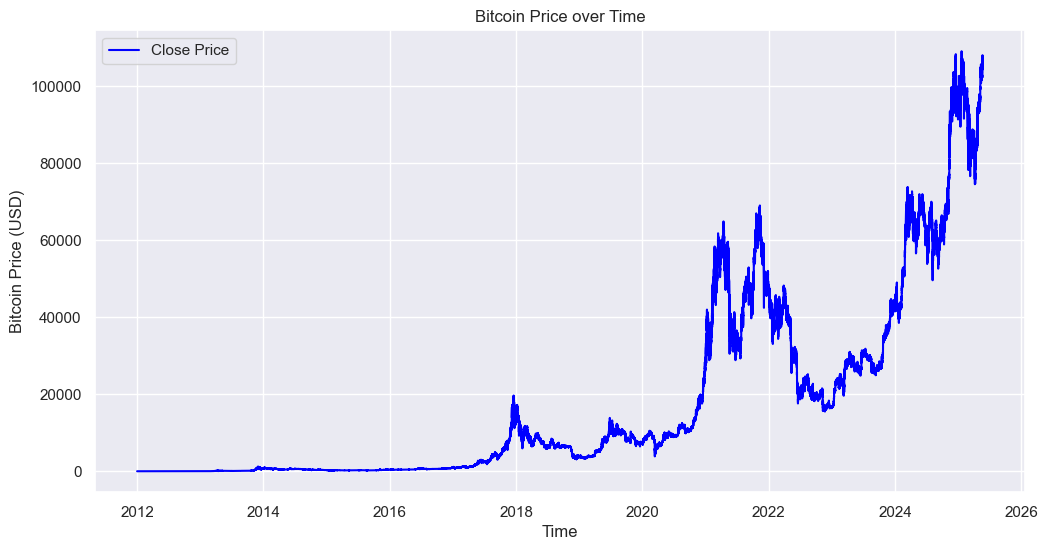

In [114]:
import matplotlib.pyplot as plt


df_holc["Timestamp"] = pd.to_datetime(df_holc["Timestamp"], unit="s")

# Plot de Closing Price over tijd
plt.figure(figsize=(12,6))
plt.plot(df_holc["Timestamp"], df_holc["Close"], label="Close Price", color="blue")

# Grafiek instellingen
plt.xlabel("Time")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price over Time")
plt.legend()
plt.grid(True)

# Weergeven
plt.show()


In [115]:
df_holc.shape

(7039184, 6)

In [116]:
df_holc.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


Basis statistieken:
                           Timestamp          Open          High  \
count                        7039184  7.039184e+06  7.039184e+06   
mean   2018-09-10 14:08:20.229224704  1.774059e+04  1.774758e+04   
min              2012-01-01 10:01:00  3.800000e+00  3.800000e+00   
25%              2015-05-07 11:56:45  4.259900e+02  4.260700e+02   
50%              2018-09-10 13:52:30  6.647110e+03  6.650825e+03   
75%              2022-01-14 15:48:15  2.761700e+04  2.762400e+04   
max              2025-05-21 13:04:00  1.091110e+05  1.093560e+05   
std                              NaN  2.458937e+04  2.459732e+04   

                Low         Close        Volume  
count  7.039184e+06  7.039184e+06  7.039184e+06  
mean   1.773337e+04  1.774058e+04  5.283990e+00  
min    3.800000e+00  3.800000e+00  0.000000e+00  
25%    4.257800e+02  4.259900e+02  1.806778e-02  
50%    6.642470e+03  6.646905e+03  4.643150e-01  
75%    2.761200e+04  2.761700e+04  3.019063e+00  
max    1.087940e+

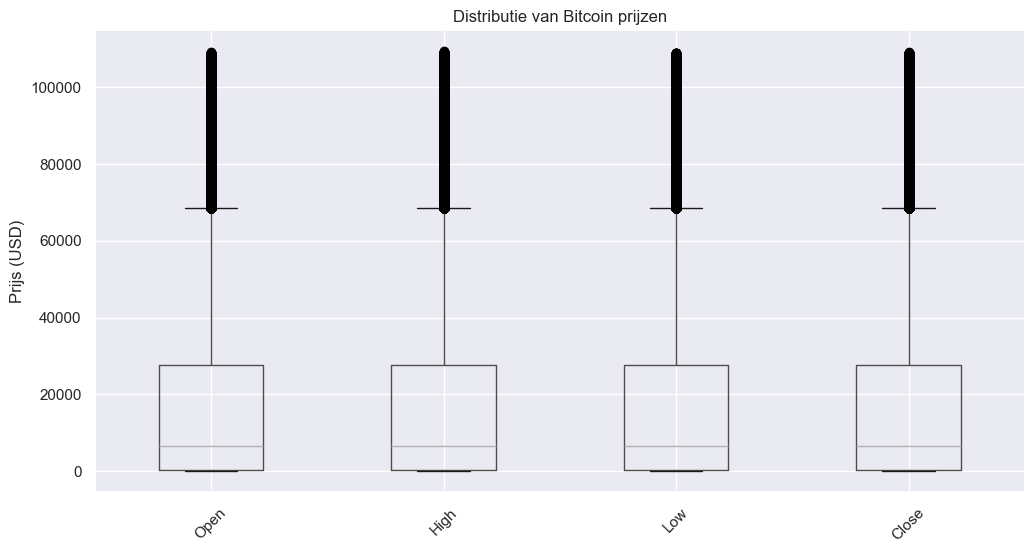

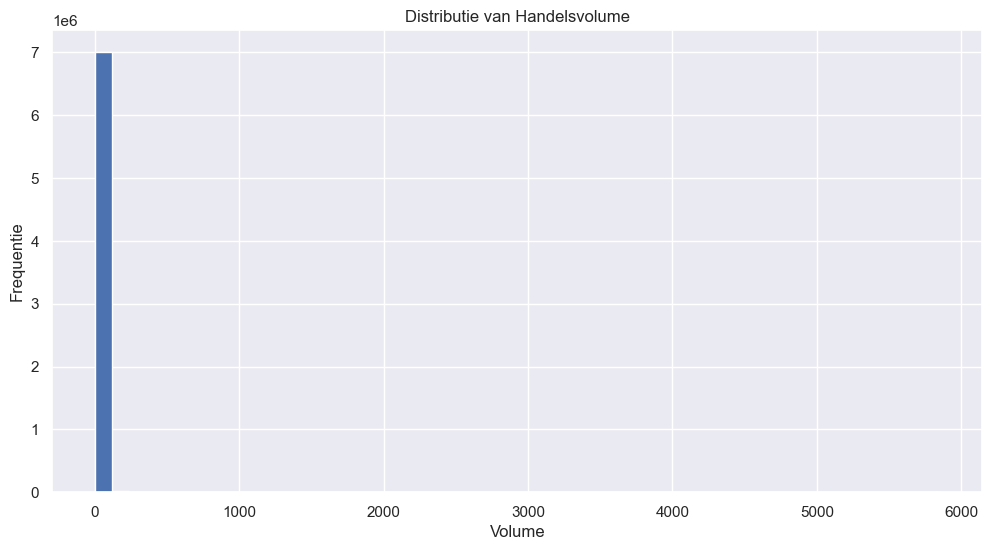

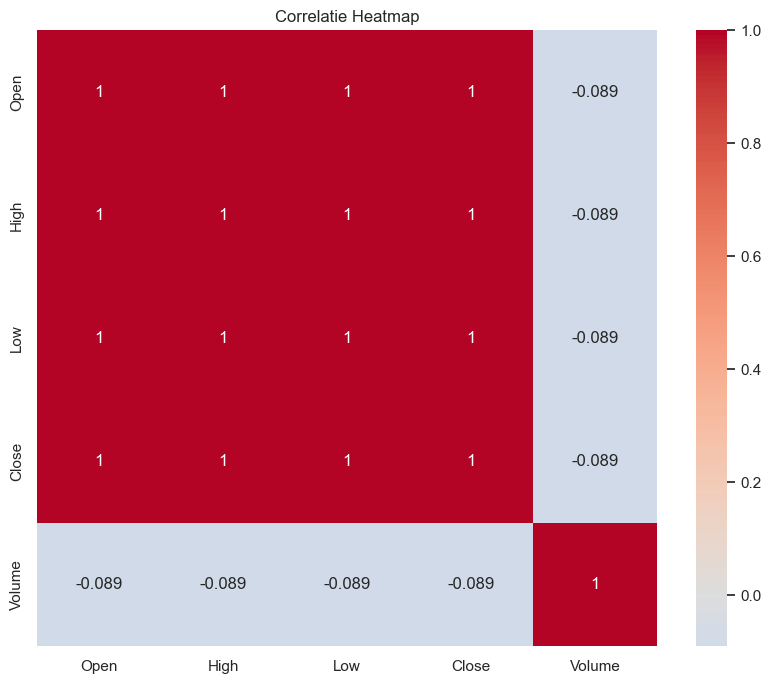

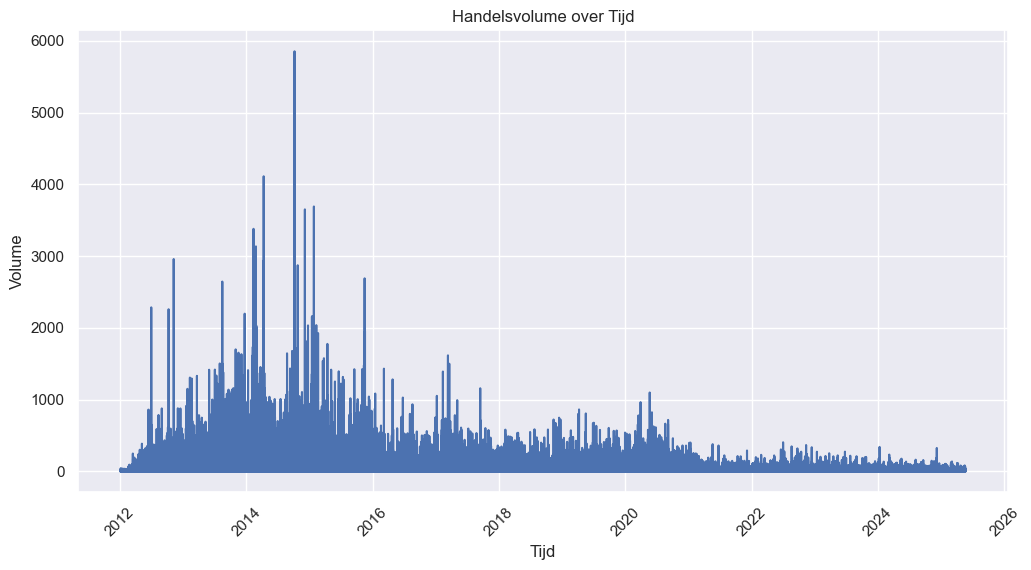


Outliers in Open:
Aantal outliers: 347475
Percentage outliers: 4.94%
Lower bound: -40360.53
Upper bound: 68403.51


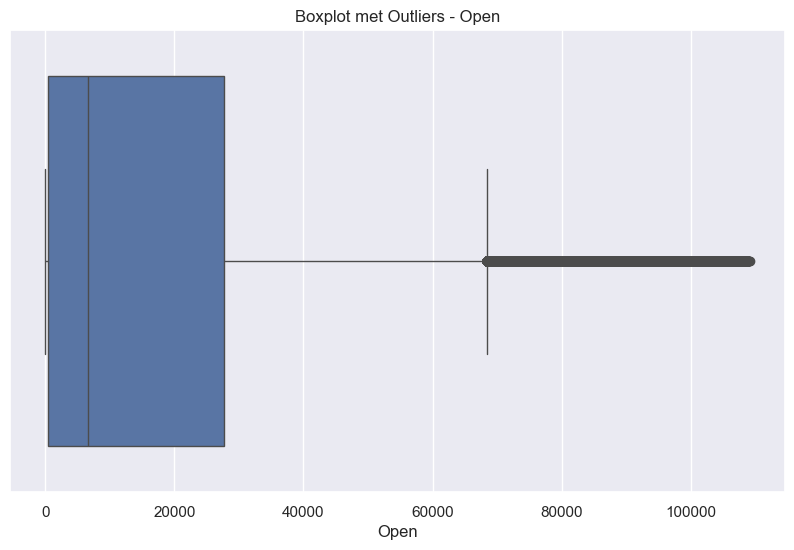


Outliers in High:
Aantal outliers: 347363
Percentage outliers: 4.93%
Lower bound: -40370.83
Upper bound: 68420.90


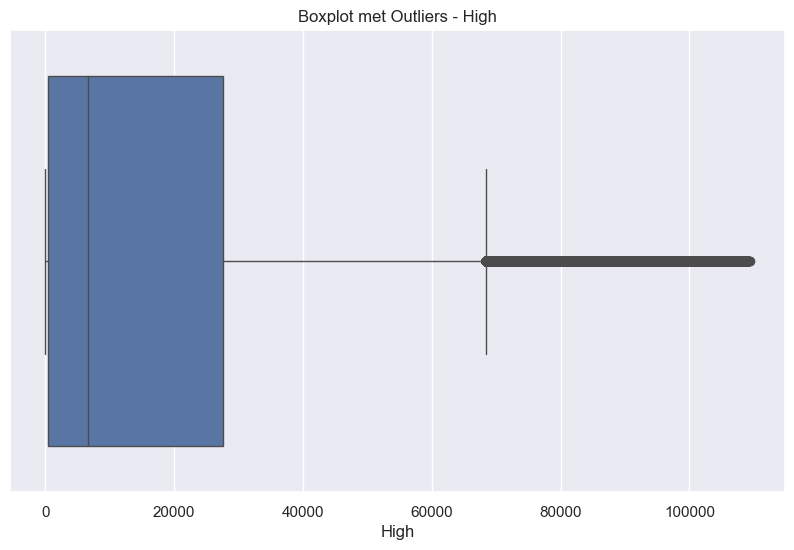


Outliers in Low:
Aantal outliers: 347384
Percentage outliers: 4.94%
Lower bound: -40353.55
Upper bound: 68391.33


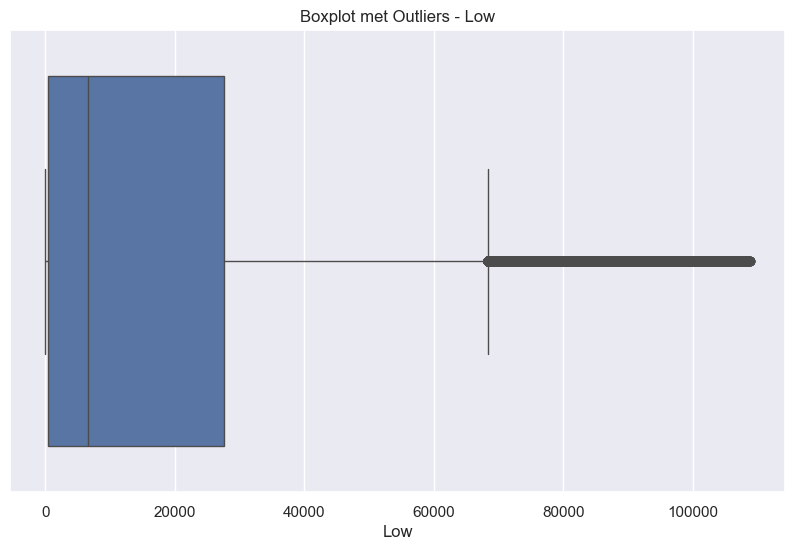


Outliers in Close:
Aantal outliers: 347504
Percentage outliers: 4.94%
Lower bound: -40360.53
Upper bound: 68403.51


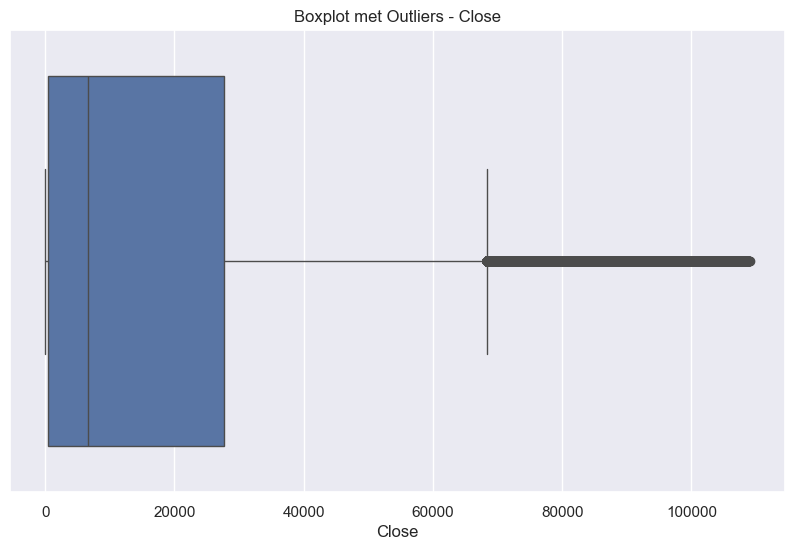


Outliers in Volume:
Aantal outliers: 985716
Percentage outliers: 14.00%
Lower bound: -4.48
Upper bound: 7.52


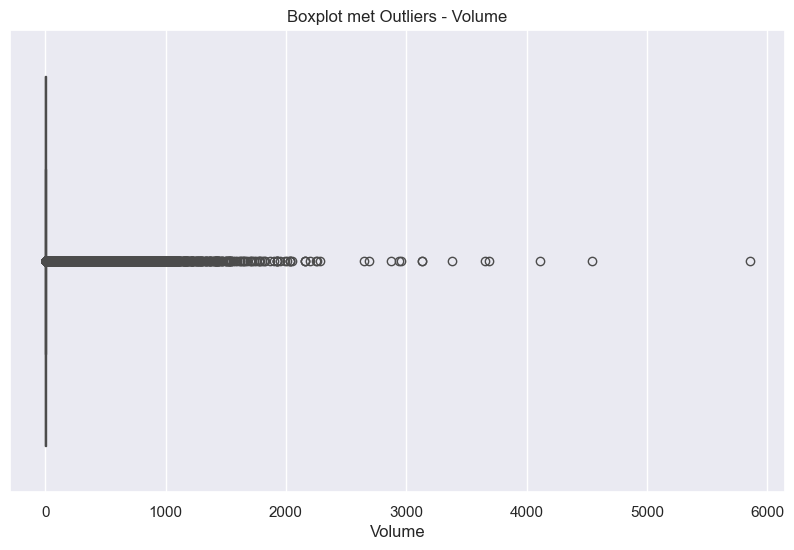


Samenvatting van de dataset:
Aantal rijen: 7039184
Tijdsperiode: van 2012-01-01 10:01:00 tot 2025-05-21 13:04:00

Prijs statistieken:
Hoogste prijs ooit: $109,356.00
Laagste prijs ooit: $3.80
Gemiddelde prijs: $17,740.58
Mediaan prijs: $6,646.90


In [117]:
# Basis statistieken van de dataset
print("Basis statistieken:")
print(df_holc.describe())

# Controleren op missende waarden
print("\nMissende waarden per kolom:")
print(df_holc.isnull().sum())

# Correlatie tussen numerieke kolommen
correlation = df_holc[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print("\nCorrelatie matrix:")
print(correlation)

# Visualisaties
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plot voor prijsdistributie
plt.figure(figsize=(12,6))
df_holc[['Open', 'High', 'Low', 'Close']].boxplot()
plt.title('Distributie van Bitcoin prijzen')
plt.ylabel('Prijs (USD)')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram van handelsvolume
plt.figure(figsize=(12,6))
plt.hist(df_holc['Volume'], bins=50)
plt.title('Distributie van Handelsvolume')
plt.xlabel('Volume')
plt.ylabel('Frequentie')
plt.show()

# 3. Correlatie heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlatie Heatmap')
plt.show()

# 4. Volume over tijd
plt.figure(figsize=(12,6))
plt.plot(df_holc['Timestamp'], df_holc['Volume'])
plt.title('Handelsvolume over Tijd')
plt.xlabel('Tijd')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

# Outlier analyse
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Outlier analyse voor elke numerieke kolom
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for column in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers(df_holc, column)
    print(f"\nOutliers in {column}:")
    print(f"Aantal outliers: {len(outliers)}")
    print(f"Percentage outliers: {(len(outliers)/len(df_holc))*100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    
    # Boxplot met outliers
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_holc[column])
    plt.title(f'Boxplot met Outliers - {column}')
    plt.show()

# Basis statistieken printen
print("\nSamenvatting van de dataset:")
print(f"Aantal rijen: {len(df_holc)}")
print(f"Tijdsperiode: van {df_holc['Timestamp'].min()} tot {df_holc['Timestamp'].max()}")
print("\nPrijs statistieken:")
print(f"Hoogste prijs ooit: ${df_holc['High'].max():,.2f}")
print(f"Laagste prijs ooit: ${df_holc['Low'].min():,.2f}")
print(f"Gemiddelde prijs: ${df_holc['Close'].mean():,.2f}")
print(f"Mediaan prijs: ${df_holc['Close'].median():,.2f}")


# Fear & Greed index data Inladen en Verkennen

In [118]:
import requests
import pandas as pd
from datetime import datetime
import time

def load_fear_greed_data(limit=0):
    """
    Load Fear & Greed Index data from the API
    Args:
        limit (int): Number of results to return. Use 0 for all available data
    Returns:
        DataFrame with Fear & Greed Index data
    """
    # API endpoint
    url = f"https://api.alternative.me/fng/?limit={limit}"
    
    try:
        # Make API request
        response = requests.get(url)
        response.raise_for_status()
        
        # Parse JSON response
        data = response.json()
        
        # Extract the data points
        data_points = data['data']
        
        # Convert to DataFrame
        df_fear_greed = pd.DataFrame(data_points)
        
        # Convert timestamp to datetime
        df_fear_greed['date'] = pd.to_datetime(df_fear_greed['timestamp'].astype(int), unit='s')
        
        # Convert value to numeric
        df_fear_greed['value'] = df_fear_greed['value'].astype(int)
        
        # Reorder columns
        df_fear_greed = df_fear_greed[['date', 'value', 'value_classification']]
        
        # Sort by date
        df_fear_greed = df_fear_greed.sort_values('date')
        
        return df_fear_greed
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

if __name__ == "__main__":
    # Load all available data
    df_fear_greed = load_fear_greed_data(limit=0)
    
    if df_fear_greed is not None:
        # Save to CSV
        df_fear_greed.to_csv('fear_greed_data.csv', index=False)
        print("Data successfully saved to fear_greed_data.csv")
        print("\nFirst few rows of the data:")
        print(df_fear_greed.head())

Data successfully saved to fear_greed_data.csv

First few rows of the data:
           date  value value_classification
2662 2018-02-01     30                 Fear
2661 2018-02-02     15         Extreme Fear
2660 2018-02-03     40                 Fear
2659 2018-02-04     24         Extreme Fear
2658 2018-02-05     11         Extreme Fear


Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2663 entries, 2662 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2663 non-null   datetime64[ns]
 1   value                 2663 non-null   int64         
 2   value_classification  2663 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 83.2+ KB
None


Basic Statistics:
--------------------------------------------------
                                date        value
count                           2663  2663.000000
mean   2021-09-26 23:55:07.998497792    47.134810
min              2018-02-01 00:00:00     5.000000
25%              2019-12-01 12:00:00    28.000000
50%              2021-09-27 00:00:00    46.000000
75%              2023-07-24 12:00:00    66.000000
max              2025-05-21 00:00:00    95.00000

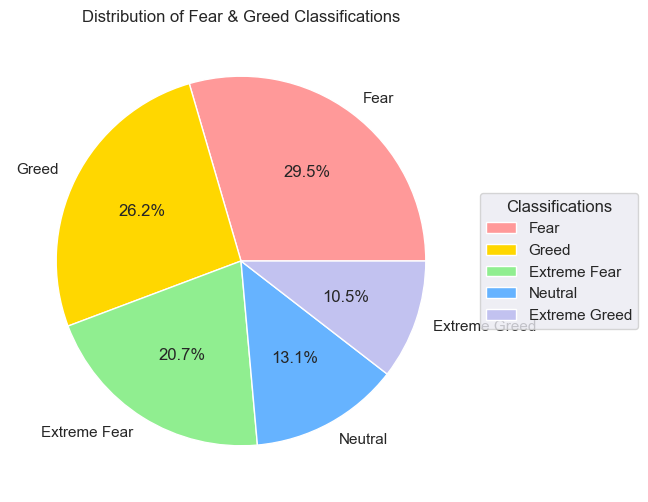

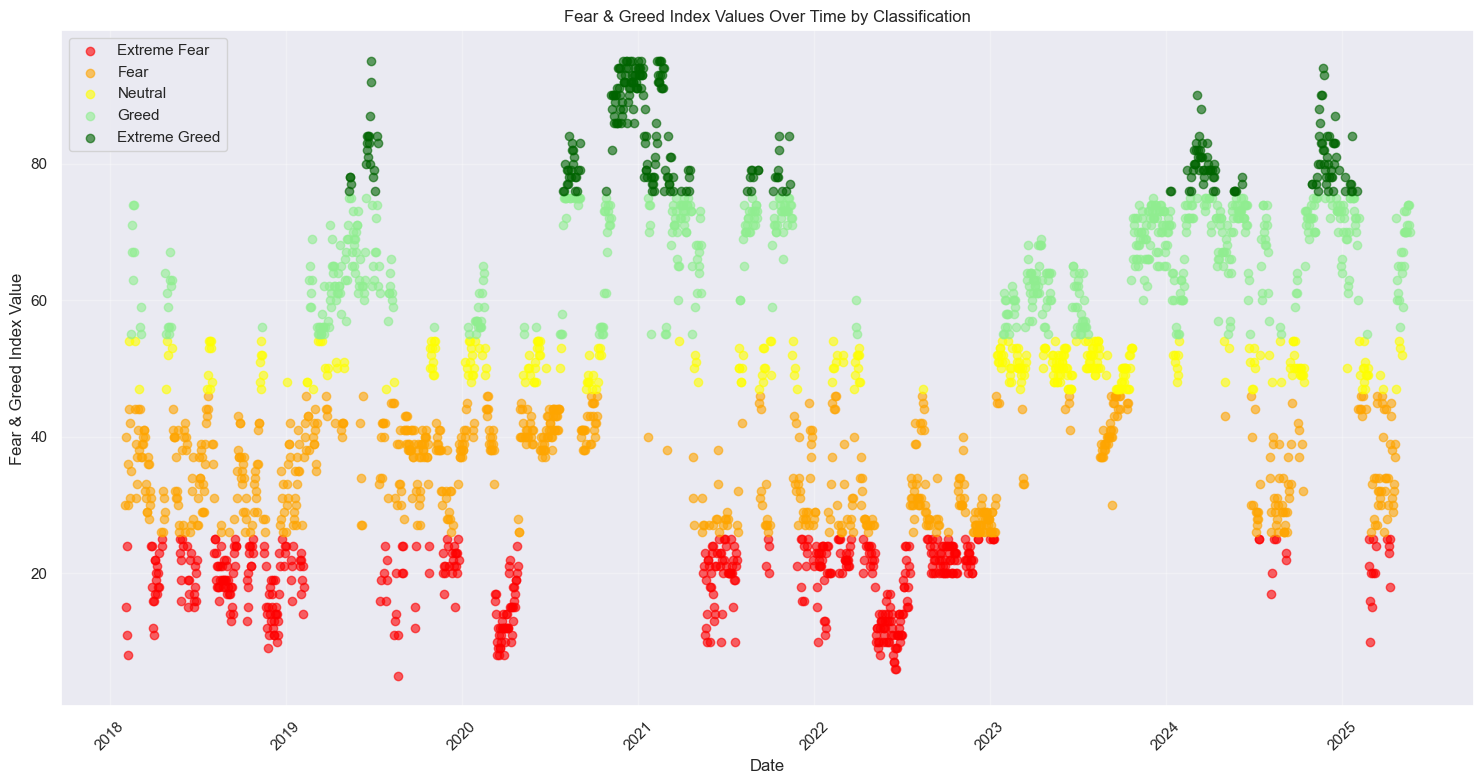

In [119]:
# Toon basis informatie over de dataset
print("Dataset Info:")
print("-" * 50)
print(df_fear_greed.info())
print("\n")

# Toon basis statistieken
print("Basic Statistics:")
print("-" * 50)
print(df_fear_greed.describe())
print("\n")

# Toon waarde tellingen voor value_classification
print("Value Classification Distribution:")
print("-" * 50)
print(df_fear_greed['value_classification'].value_counts())
print("\n")

# Controleer op ontbrekende waarden
print("Missing Values:")
print("-" * 50)
print(df_fear_greed.isnull().sum())
print("\n")

# Toon datum bereik
print("Date Range:")
print("-" * 50)
print(f"Start Date: {df_fear_greed['date'].min()}")
print(f"End Date: {df_fear_greed['date'].max()}")
print(f"Total Days: {len(df_fear_greed)}")
print("\n")

# Toon waarde distributie statistieken
print("Fear & Greed Index Distribution:")
print("-" * 50)
print("Value ranges:")
print("Extreme Fear (0-25):", len(df_fear_greed[df_fear_greed['value'] <= 25]))
print("Fear (26-45):", len(df_fear_greed[(df_fear_greed['value'] > 25) & (df_fear_greed['value'] <= 45)]))
print("Neutral (46-55):", len(df_fear_greed[(df_fear_greed['value'] > 45) & (df_fear_greed['value'] <= 55)]))
print("Greed (56-75):", len(df_fear_greed[(df_fear_greed['value'] > 55) & (df_fear_greed['value'] <= 75)]))
print("Extreme Greed (76-100):", len(df_fear_greed[df_fear_greed['value'] > 75]))

# Maak visualisatie van waarde classificatie distributie
plt.figure(figsize=(12, 6))

# Maak taartdiagram
value_counts = df_fear_greed['value_classification'].value_counts()
colors = ['#ff9999', '#ffd700', '#90ee90', '#66b3ff', '#c2c2f0']
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Fear & Greed Classifications')

# Voeg legenda toe
plt.legend(value_counts.index, title="Classifications", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# Maak tijdreeks visualisatie met kleur-gecodeerde classificaties
plt.figure(figsize=(15, 8))

# Maak scatter plot met kleurcodering
colors = {'Extreme Fear': 'red', 'Fear': 'orange', 'Neutral': 'yellow', 
          'Greed': 'lightgreen', 'Extreme Greed': 'darkgreen'}

for classification in colors:
    mask = df_fear_greed['value_classification'] == classification
    plt.scatter(df_fear_greed[mask]['date'], df_fear_greed[mask]['value'], 
                c=colors[classification], label=classification, alpha=0.6)

plt.title('Fear & Greed Index Values Over Time by Classification')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Index Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [120]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


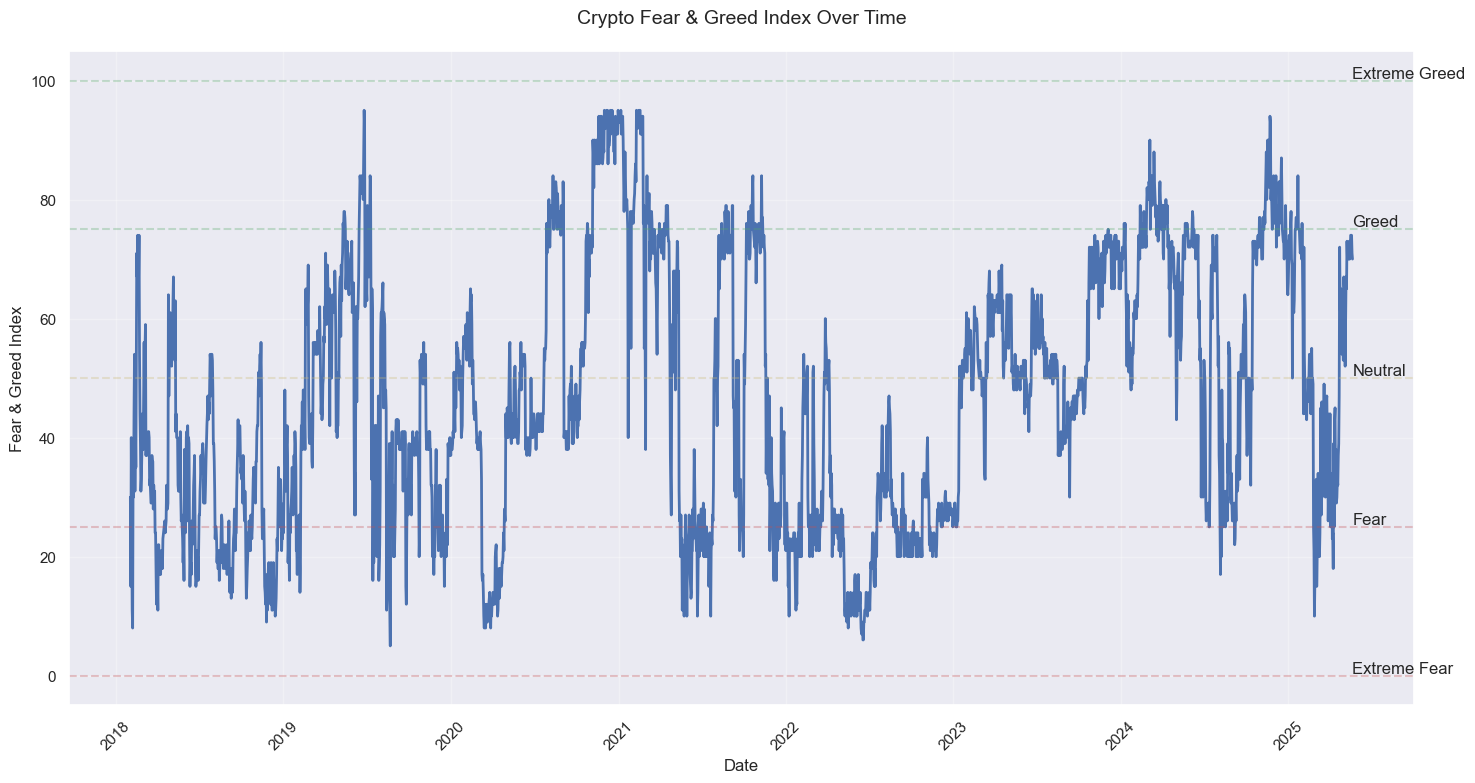

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stel de stijl in
plt.style.use('default') 
sns.set_theme() 

# Maak de grafiek
plt.figure(figsize=(15, 8))
plt.plot(df_fear_greed['date'], df_fear_greed['value'], linewidth=2)

# Voeg horizontale lijnen toe voor de sentiment niveaus
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=25, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=50, color='y', linestyle='--', alpha=0.3)
plt.axhline(y=75, color='g', linestyle='--', alpha=0.3)
plt.axhline(y=100, color='g', linestyle='--', alpha=0.3)

# Voeg labels toe
plt.title('Crypto Fear & Greed Index Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fear & Greed Index', fontsize=12)

# Voeg sentiment labels toe
plt.text(df_fear_greed['date'].max(), 0, 'Extreme Fear', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 25, 'Fear', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 50, 'Neutral', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 75, 'Greed', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 100, 'Extreme Greed', verticalalignment='bottom')

# Rotate x-axis labels voor betere leesbaarheid
plt.xticks(rotation=45)

# Voeg grid toe
plt.grid(True, alpha=0.3)

# Pas de layout aan
plt.tight_layout()

# Toon de grafiek
plt.show()

Dataset informatie:
<class 'pandas.core.frame.DataFrame'>
Index: 2663 entries, 2662 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2663 non-null   datetime64[ns]
 1   value                 2663 non-null   int64         
 2   value_classification  2663 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 83.2+ KB
None

Beschrijvende statistieken:
                                date        value
count                           2663  2663.000000
mean   2021-09-26 23:55:07.998497792    47.134810
min              2018-02-01 00:00:00     5.000000
25%              2019-12-01 12:00:00    28.000000
50%              2021-09-27 00:00:00    46.000000
75%              2023-07-24 12:00:00    66.000000
max              2025-05-21 00:00:00    95.000000
std                              NaN    21.830012

Unieke waarden per kolom:

date:
2

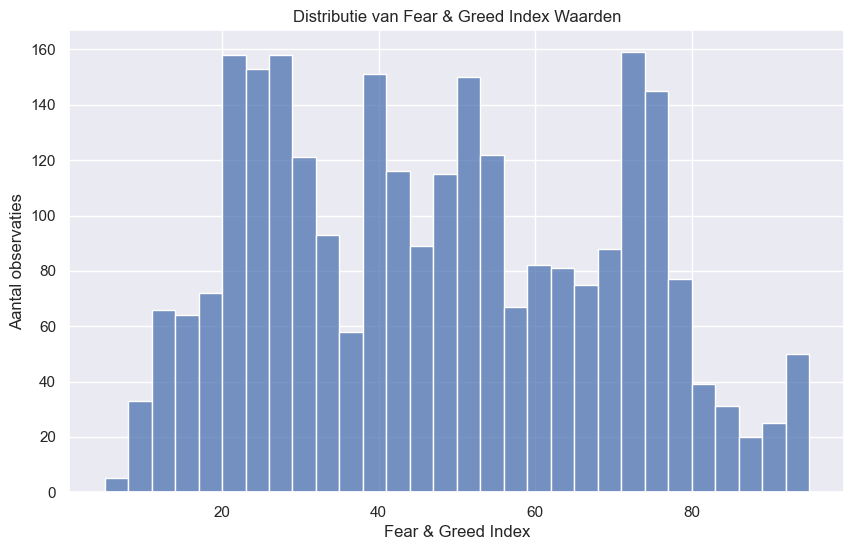

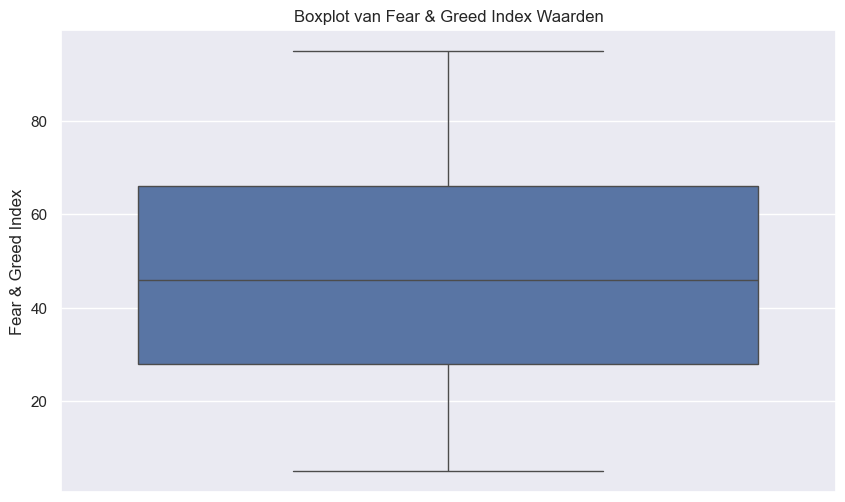


Jaarlijkse statistieken:
      count       mean        std   min   25%   50%   75%   max
date                                                           
2018  331.0  30.848943  13.555995   8.0  20.0  28.0  39.0  74.0
2019  365.0  45.120548  18.136289   5.0  32.0  41.0  61.0  95.0
2020  366.0  52.852459  23.670804   8.0  40.0  49.0  75.0  95.0
2021  365.0  54.860274  25.055426  10.0  27.0  65.0  75.0  95.0
2022  365.0  25.317808  10.135502   6.0  20.0  24.0  29.0  60.0
2023  365.0  54.704110  10.972749  25.0  49.0  53.0  63.0  75.0
2024  365.0  63.309589  17.361225  17.0  52.0  71.0  75.0  94.0
2025  141.0  50.751773  18.754868  10.0  34.0  49.0  70.0  84.0


In [122]:
# Print algemene informatie over de dataset
print("Dataset informatie:")
print(df_fear_greed.info())

# Print beschrijvende statistieken
print("\nBeschrijvende statistieken:")
print(df_fear_greed.describe())

# Print unieke waarden per kolom
print("\nUnieke waarden per kolom:")
for column in df_fear_greed.columns:
    print(f"\n{column}:")
    print(df_fear_greed[column].nunique())

# Correlaties tussen numerieke kolommen
print("\nCorrelatiematrix:")
numeric_columns = df_fear_greed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_fear_greed[numeric_columns].corr()
print(correlation_matrix)

# Visualiseer de distributie van de Fear & Greed waarden
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fear_greed, x='value', bins=30)
plt.title('Distributie van Fear & Greed Index Waarden')
plt.xlabel('Fear & Greed Index')
plt.ylabel('Aantal observaties')
plt.show()

# Boxplot voor outlier detectie
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fear_greed, y='value')
plt.title('Boxplot van Fear & Greed Index Waarden')
plt.ylabel('Fear & Greed Index')
plt.show()

# Print samenvattende statistieken per jaar
print("\nJaarlijkse statistieken:")
yearly_stats = df_fear_greed.groupby(df_fear_greed['date'].dt.year)['value'].describe()
print(yearly_stats)


# Fear & Greed data Cleanen en Prepereren 

In [123]:
# Print de eerste paar rijen van de datetime kolom
print("First few timestamps in df_fear_greed:")
print(df_fear_greed['date'].head())

# Print informatie over de datetime kolom
print("\nDatetime info:")
print(df_fear_greed['date'].dtype)

# Print unieke timestamps per dag om te zien hoe vaak per dag wordt gemeten
print("\nUnique timestamps per day:")
print(df_fear_greed['date'].dt.date.value_counts().sort_index().head())


First few timestamps in df_fear_greed:
2662   2018-02-01
2661   2018-02-02
2660   2018-02-03
2659   2018-02-04
2658   2018-02-05
Name: date, dtype: datetime64[ns]

Datetime info:
datetime64[ns]

Unique timestamps per day:
date
2018-02-01    1
2018-02-02    1
2018-02-03    1
2018-02-04    1
2018-02-05    1
Name: count, dtype: int64


In [124]:
# Vind de vroegste datum in de dataset
earliest_date = df_fear_greed['date'].min()
print(f"De vroegste datum in de Fear & Greed dataset is: {earliest_date}")


De vroegste datum in de Fear & Greed dataset is: 2018-02-01 00:00:00


In [125]:
# Converteer date kolom naar datetime formaat 
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])

# Voeg Timestamp kolom toe met alleen de datum
df_fear_greed['Timestamp'] = df_fear_greed['date'].dt.date

# Converteer Timestamp naar datetime formaat om overeen te komen met andere dataframes
df_fear_greed['Timestamp'] = pd.to_datetime(df_fear_greed['Timestamp'])

# Verifieer de nieuwe kolom
print("\nFirst few rows with new Timestamp column:")
print(df_fear_greed.head())



First few rows with new Timestamp column:
           date  value value_classification  Timestamp
2662 2018-02-01     30                 Fear 2018-02-01
2661 2018-02-02     15         Extreme Fear 2018-02-02
2660 2018-02-03     40                 Fear 2018-02-03
2659 2018-02-04     24         Extreme Fear 2018-02-04
2658 2018-02-05     11         Extreme Fear 2018-02-05


In [126]:
# Verwijder de date kolom en herorden kolommen om Timestamp eerst te hebben
df_fear_greed = df_fear_greed.drop('date', axis=1)
df_fear_greed = df_fear_greed[['Timestamp', 'value', 'value_classification']]

# Toon de eerste paar rijen om de wijzigingen te verifiëren
print("Updated fear & greed dataframe:")
print(df_fear_greed.head())


Updated fear & greed dataframe:
      Timestamp  value value_classification
2662 2018-02-01     30                 Fear
2661 2018-02-02     15         Extreme Fear
2660 2018-02-03     40                 Fear
2659 2018-02-04     24         Extreme Fear
2658 2018-02-05     11         Extreme Fear


# BTC Historic Price HOLC Data Cleanen en Prepareren 

In [127]:
# Resample naar dagelijkse candlestick-structuur
# Eerst Timestamp als index zetten
df_holc = df_holc.set_index('Timestamp')

# Nu resamplen naar dagelijkse data
df_daily = df_holc.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

# Controleer resultaat
print(df_daily.head())


   Timestamp  Open  High   Low  Close      Volume
0 2012-01-01  4.58  4.84  4.58   4.84   10.000000
1 2012-01-02  4.84  5.00  4.84   5.00   10.100000
2 2012-01-03  5.00  5.32  5.00   5.29  107.085281
3 2012-01-04  5.29  5.57  4.93   5.57  107.233260
4 2012-01-05  5.57  6.46  5.57   6.42   70.328742


In [128]:
df_daily

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01,4.58,4.84,4.58,4.84,10.000000
1,2012-01-02,4.84,5.00,4.84,5.00,10.100000
2,2012-01-03,5.00,5.32,5.00,5.29,107.085281
3,2012-01-04,5.29,5.57,4.93,5.57,107.233260
4,2012-01-05,5.57,6.46,5.57,6.42,70.328742
...,...,...,...,...,...,...
4885,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889
4886,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396
4887,2025-05-19,106520.00,107115.00,102126.00,105622.00,1677.932123
4888,2025-05-20,105630.00,107340.00,104232.00,106855.00,1462.424853


In [129]:
# Rename df_daily to df_holc_daily
df_holc_daily = df_daily.copy()


In [130]:
# Calculate 7-day and 30-day moving averages of closing prices
df_holc_daily['MA7'] = df_holc_daily['Close'].rolling(window=7).mean()
df_holc_daily['MA30'] = df_holc_daily['Close'].rolling(window=30).mean()



In [131]:
# Filter HOLC data to keep only records from 2018-02-01 onwards
df_holc_daily = df_holc_daily[df_holc_daily['Timestamp'] >= '2018-02-01']

# Reset index after filtering
df_holc_daily.reset_index(drop=True, inplace=True)

print("HOLC data after filtering to 2018-02-01 onwards:")
print(df_holc_daily.head())

HOLC data after filtering to 2018-02-01 onwards:
   Timestamp     Open      High      Low    Close        Volume           MA7  \
0 2018-02-01  9974.91  10187.56  8820.96  8970.00  20517.085284  10602.648571   
1 2018-02-02  8970.00   9234.10  7625.25  8580.00  47828.982222  10250.204286   
2 2018-02-03  8551.19   9443.96  8170.71  9386.72  17968.929040   9956.165714   
3 2018-02-04  9391.30   9491.20  8189.32  8301.65  14407.720751   9484.974286   
4 2018-02-05  8301.65   8416.03  6865.66  6877.61  37314.242065   8862.992857   

           MA30  
0  12637.540000  
1  12429.063333  
2  12249.274000  
3  11980.415000  
4  11650.574333  


In [132]:
df_holc_daily

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333
...,...,...,...,...,...,...,...,...
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000
2664,2025-05-19,106520.00,107115.00,102126.00,105622.00,1677.932123,104322.857143,98037.300000
2665,2025-05-20,105630.00,107340.00,104232.00,106855.00,1462.424853,104711.428571,98759.200000


# Samenvoegen van de BTC Price Historic dataset en Fear & Greed index dataset

In [133]:
# Zorg dat alle Timestamp-kolommen datetime64[ns] zijn, zonder tijdzone
df_holc_daily['Timestamp'] = pd.to_datetime(df_holc_daily['Timestamp']).dt.tz_localize(None)
df_fear_greed['Timestamp'] = pd.to_datetime(df_fear_greed['Timestamp']).dt.tz_localize(None)


In [30]:
# Merge alle datasets op Timestamp
df_combined = df_holc_daily.merge(df_fear_greed[['Timestamp', 'value', 'value_classification']], on='Timestamp', how='left')


In [31]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear
...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,Greed
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,Greed
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,Greed
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,Greed


In [32]:
# This means the last date where none of the columns from any dataset are NaN
last_complete_date = df_combined.dropna().iloc[-1]['Timestamp']
print(f"Last date with complete data from all datasets: {last_complete_date}")


Last date with complete data from all datasets: 2025-05-19 00:00:00


In [33]:
# Filter df_combined to keep only rows up to 2025-05-12
df_combined = df_combined[df_combined['Timestamp'] <= '2025-05-12']


In [34]:
df_combined = df_combined.reindex(columns=['Timestamp'] + [col for col in df_combined.columns if col != 'Timestamp'])
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear
...,...,...,...,...,...,...,...,...,...,...
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,Greed
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,Greed
2655,2025-05-10,102992.00,104985.00,102845.00,104809.00,624.265066,99138.571429,92103.666667,70.0,Greed
2656,2025-05-11,104809.00,104958.00,103369.00,104129.00,718.368323,100540.428571,92795.166667,70.0,Greed


# Bear & Bull Markets Features toevoegen:

In [35]:
import numpy as np

df_combined = df_combined.copy() 

df_combined['SMA_50'] = df_combined['Close'].rolling(window=50).mean()
df_combined['SMA_200'] = df_combined['Close'].rolling(window=200).mean()
df_combined['market_regime'] = np.where(df_combined['SMA_50'] > df_combined['SMA_200'], 'Bull', 'Bear')


In [36]:
df_combined = df_combined.drop(['SMA_50', 'SMA_200'], axis=1)

In [37]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear,Bear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear,Bear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear,Bear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear,Bear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear,Bear
...,...,...,...,...,...,...,...,...,...,...,...
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,Greed,Bear
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,Greed,Bear
2655,2025-05-10,102992.00,104985.00,102845.00,104809.00,624.265066,99138.571429,92103.666667,70.0,Greed,Bear
2656,2025-05-11,104809.00,104958.00,103369.00,104129.00,718.368323,100540.428571,92795.166667,70.0,Greed,Bear


In [ ]:
# Group consecutive periods with the same market regime
regime_changes = df_combined['market_regime'].ne(df_combined['market_regime'].shift()).cumsum()
regime_periods = df_combined.groupby(regime_changes).agg({
    'Timestamp': ['first', 'last'],
    'market_regime': 'first'
}).reset_index(drop=True)


regime_periods.columns = ['Start Date', 'End Date', 'Market Regime']

# Calculate duration in days for each period
regime_periods['Duration (days)'] = (pd.to_datetime(regime_periods['End Date']) - 
                                   pd.to_datetime(regime_periods['Start Date'])).dt.days

print("\nMarket Regime Periods:")
print(regime_periods.to_string(index=False))

# Calculate summary statistics
total_days = regime_periods['Duration (days)'].sum()
bull_days = regime_periods[regime_periods['Market Regime'] == 'Bull']['Duration (days)'].sum()
bear_days = regime_periods[regime_periods['Market Regime'] == 'Bear']['Duration (days)'].sum()

print(f"\nSummary Statistics:")
print(f"Total days analyzed: {total_days}")
print(f"Days in Bull market: {bull_days} ({(bull_days/total_days*100):.1f}%)")
print(f"Days in Bear market: {bear_days} ({(bear_days/total_days*100):.1f}%)")



Market Regime Periods:
Start Date   End Date Market Regime  Duration (days)
2018-02-01 2019-04-22          Bear              445
2019-04-23 2019-10-25          Bull              185
2019-10-26 2020-02-18          Bear              115
2020-02-19 2020-03-25          Bull               35
2020-03-26 2020-05-20          Bear               55
2020-05-21 2021-06-18          Bull              393
2021-06-19 2021-09-14          Bear               87
2021-09-15 2022-01-14          Bull              121
2022-01-15 2023-02-06          Bear              387
2023-02-07 2023-09-11          Bull              216
2023-09-12 2023-10-29          Bear               47
2023-10-30 2024-08-09          Bull              284
2024-08-10 2024-10-26          Bear               77
2024-10-27 2025-04-06          Bull              161
2025-04-07 2025-05-12          Bear               35

Summary Statistics:
Total days analyzed: 2643
Days in Bull market: 1395 (52.8%)
Days in Bear market: 1248 (47.2%)


In [39]:
# Convert market_regime to binary values (1 for Bull, 0 for Bear)
df_combined['market_regime'] = (df_combined['market_regime'] == 'Bull').astype(int)
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear,0
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear,0
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear,0
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear,0
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear,0
...,...,...,...,...,...,...,...,...,...,...,...
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,Greed,0
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,Greed,0
2655,2025-05-10,102992.00,104985.00,102845.00,104809.00,624.265066,99138.571429,92103.666667,70.0,Greed,0
2656,2025-05-11,104809.00,104958.00,103369.00,104129.00,718.368323,100540.428571,92795.166667,70.0,Greed,0


In [40]:
# Rename 'value' column to 'fear_greed_index' and drop 'value_classification' column
df_combined = df_combined.rename(columns={'value': 'fear_greed_index'})
df_combined = df_combined.drop('value_classification', axis=1)
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0
...,...,...,...,...,...,...,...,...,...,...
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0
2655,2025-05-10,102992.00,104985.00,102845.00,104809.00,624.265066,99138.571429,92103.666667,70.0,0
2656,2025-05-11,104809.00,104958.00,103369.00,104129.00,718.368323,100540.428571,92795.166667,70.0,0


# Target Value (Y) Toevoegen 

De Volgende klasse zijn gedefineert om ongeveer een van elke klasse evenveel voorbeelden te hebben (gebalanceerde target value kolom):

- UP = 1 
- Neutraal = 0 (+-1% daling/stijging)
- Down = -1 

In [41]:
# Bereken procentuele verandering naar de volgende dag
df_combined['next_close'] = df_combined['Close'].shift(-1)
df_combined['return_pct'] = (df_combined['next_close'] - df_combined['Close']) / df_combined['Close']

# Stel label vast: 
# -1 = sterke daling (meer dan -1%)
# 0 = neutraal (tussen -1% en +1% verandering)
# 1 = sterke stijging (meer dan +1%)
def classify_movement(pct_change, threshold=0.01):  # 1%
    if pct_change > threshold:
        return 1     # sterke stijging (>1%)
    elif pct_change < -threshold:
        return -1    # sterke daling (<-1%) 
    else:
        return 0     # neutraal (-1% tot +1%)

df_combined['y'] = df_combined['return_pct'].apply(classify_movement)

print(df_combined['y'].value_counts())


y
 0    979
 1    882
-1    797
Name: count, dtype: int64


In [42]:
# Print total number of rows in dataframe
print(f"Total number of rows in dataframe: {len(df_combined)}")
# Print total number of values in y column
print(f"Total number of values in y column: {df_combined['y'].count()}")


Total number of rows in dataframe: 2658
Total number of values in y column: 2658


# Vensters maken van 30 dagen:
Ik gebruik de afgelopen 30 dagen om 1 dag vooruit te voorspellen. Ik maak dus vensters van 30 dagen waarin de target value de prijsbeweging van de volgende dag is. 

In [43]:
import numpy as np

window_size = 30

feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA7', 'MA30', 'fear_greed_index', 'market_regime']

X = []
y = []

for i in range(len(df_combined) - window_size - 1):
    X.append(df_combined[feature_columns].iloc[i:i+window_size].values)
    
    price_today = df_combined['Close'].iloc[i + window_size - 1]
    price_tomorrow = df_combined['Close'].iloc[i + window_size]
    
    # Bereken procentuele verandering
    perc_change = (price_tomorrow - price_today) / price_today

    # Classificatie op basis van 1% drempel
    if perc_change > 0.01:
        label = 1  # Up (>1% stijging)
    elif perc_change < -0.01:
        label = -1  # Down (>1% daling)
    else:
        label = 0  # Neutraal (tussen -1% en +1%)
    y.append(label)

X = np.array(X)
y = np.array(y)

print(f'X shape: {X.shape}')  # (aantal samples, 30, aantal features)
print(f'y shape: {y.shape}')  # (aantal samples,)


X shape: (2627, 30, 9)
y shape: (2627,)


# Data splitsen

Time based split (70-15-15)

In [44]:
# Bepaal totale lengte
n_total = X.shape[0]

# Bepaal de indices voor de splitsing (70% train, 15% val, 15% test)
train_end = int(n_total * 0.7)
val_end = int(n_total * 0.85)

# Splits X en y op basis van tijdsvolgorde
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

# Print shapes om te checken
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (1838, 30, 9) (1838,)
Validation: (394, 30, 9) (394,)
Test: (395, 30, 9) (395,)


In [45]:
# Bereken de verdeling van market regimes in de trainingsdata
# -1 = dalen, 0 = neutraal, 1 = stijgen
unique_values, counts = np.unique(y_train, return_counts=True)

# Bereken percentages
total = len(y_train)
percentages = (counts / total) * 100

# Print resultaten
print("\nVerdeling klasen in y_train:")
print(f"Dalen (-1): {counts[0]} samples ({percentages[0]:.1f}%)")
print(f"Neutraal (0): {counts[1]} samples ({percentages[1]:.1f}%)")
print(f"Stijgen (1): {counts[2]} samples ({percentages[2]:.1f}%)")



Verdeling klasen in y_train:
Dalen (-1): 575 samples (31.3%)
Neutraal (0): 629 samples (34.2%)
Stijgen (1): 634 samples (34.5%)


In [46]:
# Bereken de verdeling van market regimes in X_train
# Flatten eerst de array om alle market regime waarden te tellen
all_regimes = X_train[:, :, -1].flatten()
unique_regimes, regime_counts = np.unique(all_regimes, return_counts=True)

# Bereken percentages van totaal aantal regimes
total_regimes = len(all_regimes)
regime_percentages = (regime_counts / total_regimes) * 100

# Print resultaten
print("\nVerdeling market regimes in X_train:")
print(f"Bear (0): {regime_counts[0]} samples ({regime_percentages[0]:.1f}%)")
print(f"Bull (1): {regime_counts[1]} samples ({regime_percentages[1]:.1f}%)")



Verdeling market regimes in X_train:
Bear (0): 32385 samples (58.7%)
Bull (1): 22755 samples (41.3%)


# Verantwoording Iteraties staat in rapport en logboek

## Baseline Model trainen en optimalisatie (XGBoost) 

In [47]:
# Flatten de input: (samples, 30, n_features) → (samples, 30 * n_features)
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))


[0]	validation_0-mlogloss:1.01582	validation_1-mlogloss:1.08087
[1]	validation_0-mlogloss:0.93874	validation_1-mlogloss:1.08013


c:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:05:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[2]	validation_0-mlogloss:0.88039	validation_1-mlogloss:1.08444
[3]	validation_0-mlogloss:0.82644	validation_1-mlogloss:1.08271
[4]	validation_0-mlogloss:0.79510	validation_1-mlogloss:1.08455
[5]	validation_0-mlogloss:0.75848	validation_1-mlogloss:1.07217
[6]	validation_0-mlogloss:0.72528	validation_1-mlogloss:1.06444
[7]	validation_0-mlogloss:0.70108	validation_1-mlogloss:1.06529
[8]	validation_0-mlogloss:0.66928	validation_1-mlogloss:1.06341
[9]	validation_0-mlogloss:0.64734	validation_1-mlogloss:1.06596
[10]	validation_0-mlogloss:0.62442	validation_1-mlogloss:1.07285
[11]	validation_0-mlogloss:0.60766	validation_1-mlogloss:1.07081
[12]	validation_0-mlogloss:0.59732	validation_1-mlogloss:1.07316
[13]	validation_0-mlogloss:0.58065	validation_1-mlogloss:1.07744
[14]	validation_0-mlogloss:0.56028	validation_1-mlogloss:1.08490
[15]	validation_0-mlogloss:0.54351	validation_1-mlogloss:1.08964
[16]	validation_0-mlogloss:0.52446	validation_1-mlogloss:1.09277
[17]	validation_0-mlogloss:0.5087

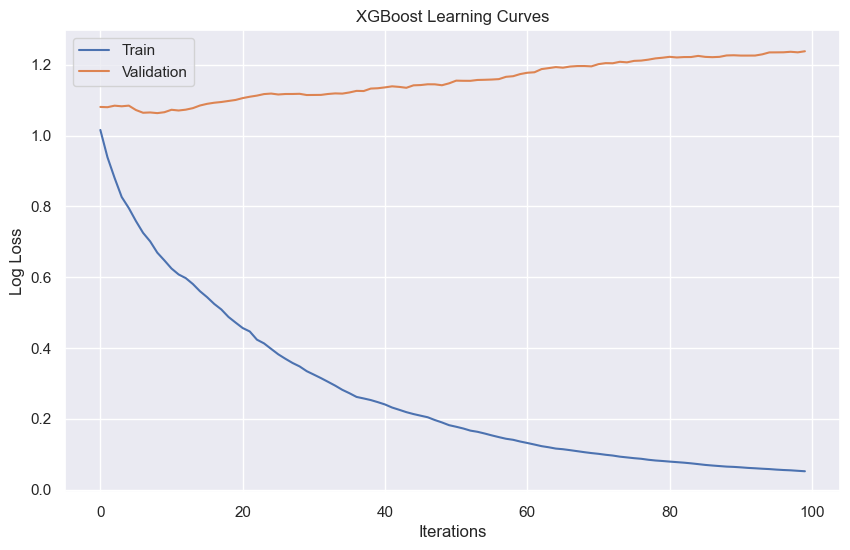


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.30      0.50      0.38        90
           1       0.58      0.49      0.53       186
           2       0.38      0.29      0.33       118

    accuracy                           0.43       394
   macro avg       0.42      0.43      0.41       394
weighted avg       0.46      0.43      0.44       394



In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Initialize XGBoost classifier
model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
)

# Convert labels from [-1,0,1] to [0,1,2]
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Train model with evaluation set
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]
model.fit(
    X_train_flat, 
    y_train_adj,
    eval_set=eval_set,
    verbose=True
)

# Get evaluation results
results = model.evals_result()

# Plot learning curves
plt.figure(figsize=(10,6))
plt.plot(results['validation_0']['mlogloss'], label='Train')
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on validation set
y_val_pred = model.predict(X_val_flat)

# Print classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_adj, y_val_pred))


Iteratie 1: (Baseline Model)

[0]	validation_0-mlogloss:1.09803	validation_1-mlogloss:1.09910
[1]	validation_0-mlogloss:1.09748	validation_1-mlogloss:1.09913
[2]	validation_0-mlogloss:1.09699	validation_1-mlogloss:1.09963
[3]	validation_0-mlogloss:1.09649	validation_1-mlogloss:1.10058
[4]	validation_0-mlogloss:1.09602	validation_1-mlogloss:1.10154
[5]	validation_0-mlogloss:1.09549	validation_1-mlogloss:1.10197
[6]	validation_0-mlogloss:1.09495	validation_1-mlogloss:1.10288
[7]	validation_0-mlogloss:1.09442	validation_1-mlogloss:1.10384
[8]	validation_0-mlogloss:1.09396	validation_1-mlogloss:1.10326
[9]	validation_0-mlogloss:1.09350	validation_1-mlogloss:1.10360
[10]	validation_0-mlogloss:1.09294	validation_1-mlogloss:1.10429
[11]	validation_0-mlogloss:1.09250	validation_1-mlogloss:1.10460
[12]	validation_0-mlogloss:1.09203	validation_1-mlogloss:1.10585
[13]	validation_0-mlogloss:1.09153	validation_1-mlogloss:1.10611
[14]	validation_0-mlogloss:1.09111	validation_1-mlogloss:1.10582
[15]	validation_0-mlogloss:1.09061	

c:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:41:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[28]	validation_0-mlogloss:1.08557	validation_1-mlogloss:1.10871
[29]	validation_0-mlogloss:1.08517	validation_1-mlogloss:1.10908
[30]	validation_0-mlogloss:1.08478	validation_1-mlogloss:1.10962
[31]	validation_0-mlogloss:1.08438	validation_1-mlogloss:1.11101
[32]	validation_0-mlogloss:1.08402	validation_1-mlogloss:1.11108
[33]	validation_0-mlogloss:1.08365	validation_1-mlogloss:1.11159
[34]	validation_0-mlogloss:1.08329	validation_1-mlogloss:1.11176
[35]	validation_0-mlogloss:1.08291	validation_1-mlogloss:1.11058
[36]	validation_0-mlogloss:1.08256	validation_1-mlogloss:1.11180
[37]	validation_0-mlogloss:1.08225	validation_1-mlogloss:1.11267
[38]	validation_0-mlogloss:1.08194	validation_1-mlogloss:1.11397
[39]	validation_0-mlogloss:1.08157	validation_1-mlogloss:1.11295
[40]	validation_0-mlogloss:1.08122	validation_1-mlogloss:1.11231
[41]	validation_0-mlogloss:1.08090	validation_1-mlogloss:1.11255
[42]	validation_0-mlogloss:1.08055	validation_1-mlogloss:1.11314
[43]	validation_0-mloglos

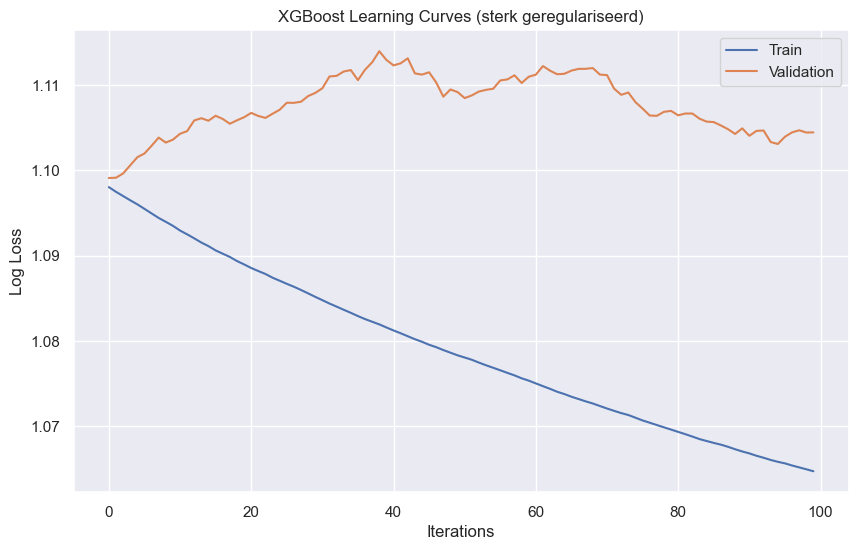

Validation performance:
              precision    recall  f1-score   support

          -1       0.29      0.27      0.28        90
           0       0.61      0.12      0.21       186
           1       0.31      0.72      0.43       118

    accuracy                           0.34       394
   macro avg       0.40      0.37      0.31       394
weighted avg       0.45      0.34      0.29       394



In [ ]:
# Labels converteren van [-1, 0, 1] naar [0, 1, 2]
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Sample weights berekenen op basis van trainingslabels
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# Sterk vereenvoudigd en zwaar geregulariseerd model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    random_state=42,
    max_depth=1,                 # Minimale boomdiepte
    learning_rate=0.03,          # Langzaam leren
    n_estimators=100,            # Weinig bomen
    subsample=0.7,               # Minder rijen per boom
    colsample_bytree=0.7,        # Minder features per boom
    reg_alpha=1.0,               # Sterke L1-penalty
    reg_lambda=20,               # Sterke L2-penalty
    min_child_weight=20,         # Split alleen bij grote groepen
    gamma=1.0                    # Splits enkel bij duidelijke winst
)

# Trainen met early stopping op validatieset
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

xgb_model.fit(
    X_train_flat, 
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set
)

# Plot de log loss curves
results = xgb_model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['mlogloss'], label='Train')
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Curves (sterk geregulariseerd)')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie
y_val_pred = xgb_model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terugconverteren naar originele labels [-1, 0, 1]

print("Validation performance:")
print(classification_report(y_val, y_val_pred))


### Iteratie 2: (Baseline Model)

In [50]:
# # Labels converteren van [-1, 0, 1] naar [0, 1, 2]
# y_train_adj = y_train + 1
# y_val_adj = y_val + 1

# # Sample weights berekenen op basis van trainingslabels
# sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# # Hyperparameter grid
# param_dist = {
#     'max_depth': [1, 2, 3],
#     'learning_rate': [0.01, 0.03, 0.05],
#     'n_estimators': [150, 200, 250],
#     'subsample': [0.6, 0.7, 0.8],
#     'colsample_bytree': [0.6, 0.7, 0.8],
#     'reg_alpha': [0.1, 0.5, 1.0],
#     'reg_lambda': [5, 10, 20],
#     'min_child_weight': [5, 10, 20],
#     'gamma': [0.1, 0.5, 1.0]
# }

# # Basis XGBoost model
# xgb_base = XGBClassifier(
#     objective='multi:softmax',
#     num_class=3,
#     eval_metric='mlogloss',
#     random_state=42
# )

# # Randomized search met progress bar
# from sklearn.model_selection import RandomizedSearchCV
# search = RandomizedSearchCV(
#     estimator=xgb_base,
#     param_distributions=param_dist,
#     n_iter=30,
#     scoring='f1_macro',
#     cv=3,
#     verbose=2,
#     n_jobs=1  # Single job to avoid pickling errors
# )

# # Fit zonder callback (gebruik verbose=2 voor voortgang)
# search.fit(X_train_flat, y_train_adj, sample_weight=sample_weights)

# # Beste params en score
# print("\nBeste hyperparameters:")
# for param, value in search.best_params_.items():
#     print(f"{param}: {value}")
# print(f"\nBeste f1_macro score: {search.best_score_:.4f}")

# # Gebruik beste model en train op volledige trainingsset
# best_model = search.best_estimator_

# # Voeg validatie toe voor learning curves
# eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# # Training met eval_set
# best_model.fit(
#     X_train_flat, 
#     y_train_adj,
#     sample_weight=sample_weights,
#     eval_set=eval_set,
#     verbose=True
# )

# # Plot learning curves
# results = best_model.evals_result()
# plt.figure(figsize=(10, 6))
# plt.plot(results['validation_0']['mlogloss'], label='Train')
# plt.plot(results['validation_1']['mlogloss'], label='Validation')
# plt.xlabel('Iterations')
# plt.ylabel('Log Loss')
# plt.title('Learning Curves van beste model na RandomizedSearchCV')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Voorspellingen en evaluatie op validatieset
# y_val_pred = best_model.predict(X_val_flat)
# y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

# print("\nValidation performance van beste model:")
# print(classification_report(y_val, y_val_pred))


[0]	validation_0-mlogloss:1.09704	validation_1-mlogloss:1.09782
[1]	validation_0-mlogloss:1.09574	validation_1-mlogloss:1.09759
[2]	validation_0-mlogloss:1.09461	validation_1-mlogloss:1.09693
[3]	validation_0-mlogloss:1.09326	validation_1-mlogloss:1.09619
[4]	validation_0-mlogloss:1.09204	validation_1-mlogloss:1.09647
[5]	validation_0-mlogloss:1.09055	validation_1-mlogloss:1.09608
[6]	validation_0-mlogloss:1.08928	validation_1-mlogloss:1.09556
[7]	validation_0-mlogloss:1.08799	validation_1-mlogloss:1.09529
[8]	validation_0-mlogloss:1.08675	validation_1-mlogloss:1.09444
[9]	validation_0-mlogloss:1.08570	validation_1-mlogloss:1.09494
[10]	validation_0-mlogloss:1.08449	validation_1-mlogloss:1.09553
[11]	validation_0-mlogloss:1.08332	validation_1-mlogloss:1.09432
[12]	validation_0-mlogloss:1.08212	validation_1-mlogloss:1.09450
[13]	validation_0-mlogloss:1.08109	validation_1-mlogloss:1.09415
[14]	validation_0-mlogloss:1.07993	validation_1-mlogloss:1.09364
[15]	validation_0-mlogloss:1.07889	

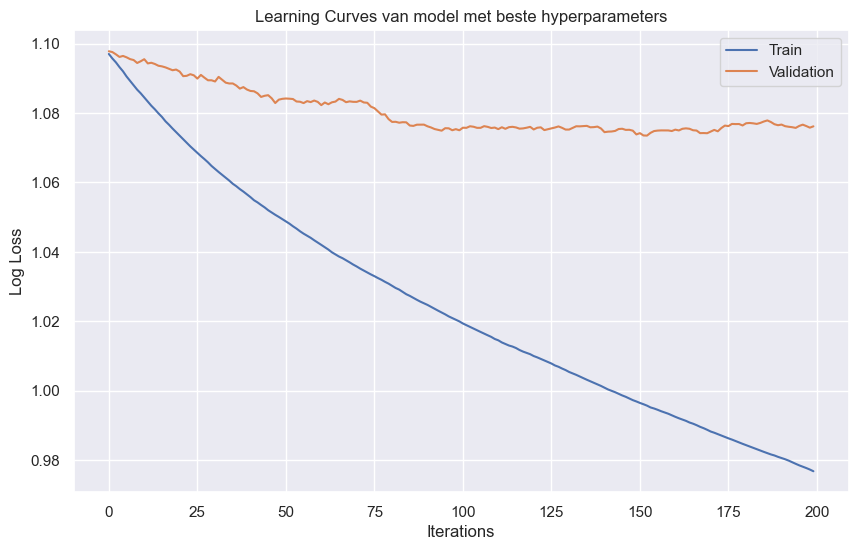


Validation performance:
              precision    recall  f1-score   support

          -1       0.29      0.48      0.36        90
           0       0.68      0.44      0.53       186
           1       0.37      0.39      0.38       118

    accuracy                           0.43       394
   macro avg       0.45      0.43      0.42       394
weighted avg       0.50      0.43      0.45       394



In [78]:
# Train model met beste hyperparameters uit RandomizedSearchCV
model_double_iter = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=0.5,
    n_estimators=200,
    min_child_weight=5,
    max_depth=2,
    learning_rate=0.03,
    gamma=0.5,
    colsample_bytree=0.8,
    random_state=42
)



# Train model met sample weights en validatieset
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

model_double_iter.fit(
    X_train_flat,
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot learning curves
results = model_double_iter.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['mlogloss'], label='Train')
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curves van model met beste hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = model_double_iter.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nValidation performance:")
print(classification_report(y_val, y_val_pred))


Analyse Iteratie 3: Uit 

# Baseline model testen 

In [52]:
# Test model op testset
y_test_pred = model_double_iter.predict(X_test_flat)
y_test_pred = y_test_pred - 1  # Terugzetten naar [-1, 0, 1]

print("\n Test performance:")
print(classification_report(y_test, y_test_pred))



📊 Test performance:
              precision    recall  f1-score   support

          -1       0.33      0.84      0.48       121
           0       0.60      0.33      0.43       158
           1       0.00      0.00      0.00       116

    accuracy                           0.39       395
   macro avg       0.31      0.39      0.30       395
weighted avg       0.34      0.39      0.32       395



# Mempool Data Inladen + Data Verkennen

### Total transaction count (avarage per day) Inladen

In [ ]:
import json
import pandas as pd

# 1. JSON-bestand laden
with open("mempool-count (2).json", "r") as f:
    data = json.load(f)

# 2. Data extraheren
records = data['mempool-count']
df = pd.DataFrame(records)

# 3. UNIX naar datum 
df['x'] = pd.to_datetime(df['x'], unit='ms')
df = df.rename(columns={'x': 'date', 'y': 'mempool_transaction_count'})
df = df.set_index('date').sort_index()

# 4. Resample naar 1 dag
df_daily = df.resample('1D').mean()

# misdata aanvullen (interpolatie of fill)
df_daily['mempool_transaction_count'] = df_daily['mempool_transaction_count'].interpolate(method='linear')

# 5. Reset index voor verder gebruik
df_daily = df_daily.reset_index()

# 6. Bekijk resultaat
print(df_daily.head(10))

#  opslaan
df_daily.to_csv("mempool_transaction_count_daily_filled.csv", index=False)


        date  mempool_transaction_count
0 2016-06-15               17325.729167
1 2016-06-16               13925.367188
2 2016-06-17               10525.005208
3 2016-06-18                6564.291667
4 2016-06-19                2603.578125
5 2016-06-20                3236.781250
6 2016-06-21                3869.984375
7 2016-06-22                4503.187500
8 2016-06-23                5105.632812
9 2016-06-24                5708.078125


## Total Transaction count Verkennen


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       3252 non-null   datetime64[ns]
 1   mempool_transaction_count  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB
None

Basic Statistics:
                      date  mempool_transaction_count
count                 3252                3252.000000
mean   2020-11-26 12:00:00               39648.725459
min    2016-06-15 00:00:00                1007.567708
25%    2018-09-05 18:00:00                4272.298177
50%    2020-11-26 12:00:00                9205.049045
75%    2023-02-17 06:00:00               47726.050781
max    2025-05-10 00:00:00              296700.505208
std                    NaN               57495.204669

Missing Values:
date                         0
mempool_t

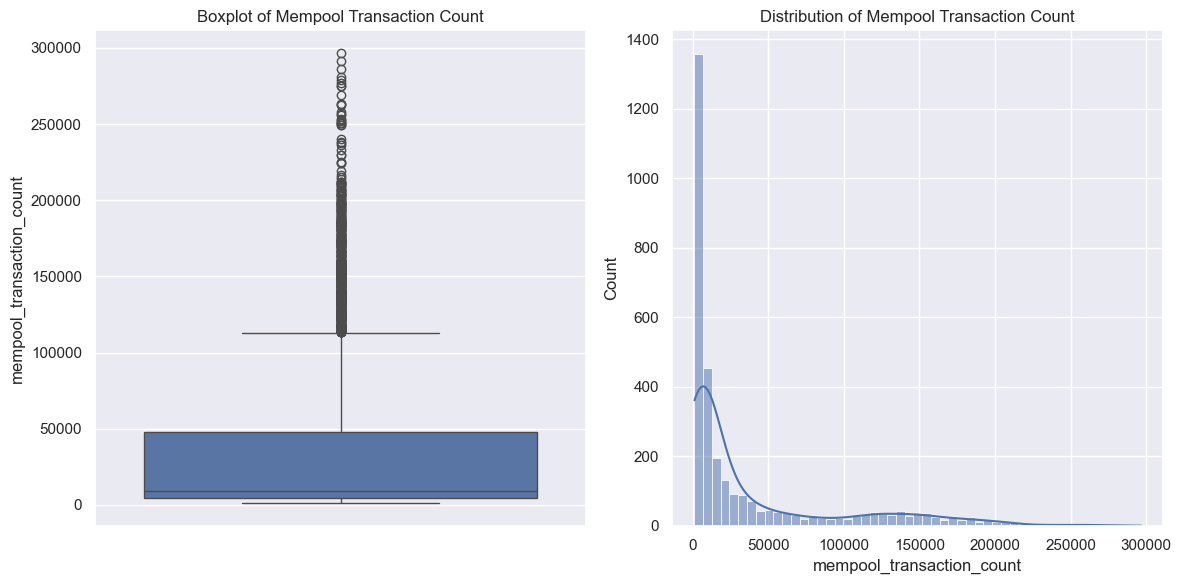

In [54]:
# Basic data exploration
print("\nDataset Info:")
print(df_daily.info())

print("\nBasic Statistics:")
print(df_daily.describe())

print("\nMissing Values:")
print(df_daily.isnull().sum())

# Check for outliers using IQR method
Q1 = df_daily['mempool_transaction_count'].quantile(0.25)
Q3 = df_daily['mempool_transaction_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_daily[(df_daily['mempool_transaction_count'] < lower_bound) | 
                    (df_daily['mempool_transaction_count'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("\nPercentage of outliers: {:.2f}%".format((len(outliers)/len(df_daily))*100))

# Visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df_daily['mempool_transaction_count'])
plt.title('Boxplot of Mempool Transaction Count')

plt.subplot(1,2,2)
sns.histplot(data=df_daily, x='mempool_transaction_count', kde=True)
plt.title('Distribution of Mempool Transaction Count')
plt.tight_layout()
plt.show()


In [55]:
# Print de laatste datum in de dataset
print("Laatste datum in dataset:", df_daily['date'].max())


Laatste datum in dataset: 2025-05-10 00:00:00


In [56]:
# Hernoemen van de dataset
daily_transaction_count = df_daily

# Filter op datums vanaf 2018-02-01
daily_transaction_count = daily_transaction_count[daily_transaction_count['date'] >= '2018-02-01']

print(daily_transaction_count.head())


          date  mempool_transaction_count
596 2018-02-01               17755.520833
597 2018-02-02               17401.867188
598 2018-02-03               17048.213542
599 2018-02-04               12023.375000
600 2018-02-05                6998.536458


# Mempool total size (in bytes) Data Inladen en verkennen

In [57]:
import pandas as pd
import json

# Laad het JSON-bestand
with open('mempool-size.json', 'r') as file:
    raw_data = json.load(file)

# Haal de lijst onder "mempool-size" op
data = raw_data['mempool-size']

# Zet om naar DataFrame
df_mempool = pd.DataFrame(data)

# Zet UNIX milliseconden naar datetime
df_mempool['x'] = pd.to_datetime(df_mempool['x'], unit='ms')

df_mempool.rename(columns={'x': 'Timestamp', 'y': 'MempoolSizeBytes'}, inplace=True)

# Zet Timestamp als index
df_mempool.set_index('Timestamp', inplace=True)

# Bekijk de eerste rijen
print(df_mempool.head())


                     MempoolSizeBytes
Timestamp                            
2016-06-15 14:45:00      2.346226e+07
2016-06-17 18:45:00      2.622095e+07
2016-06-19 22:45:00      4.464119e+06
2016-06-22 02:45:00      5.215474e+06
2016-06-24 06:45:00      1.134712e+07


In [58]:
# Resample data naar dagelijkse intervallen en interpoleer ontbrekende waarden
daily_mempoolsize = df_mempool.resample('D').mean().interpolate()

# Reset de index zodat Timestamp weer een kolom wordt
daily_mempoolsize = daily_mempoolsize.reset_index()

# Filter op datums vanaf 2018-02-01 om consistent te zijn met andere data
daily_mempoolsize = daily_mempoolsize[daily_mempoolsize['Timestamp'] >= '2018-02-01']

print(daily_mempoolsize.head())


     Timestamp  MempoolSizeBytes
596 2018-02-01      5.210158e+07
597 2018-02-02      5.232593e+07
598 2018-02-03      5.255029e+07
599 2018-02-04      3.624007e+07
600 2018-02-05      1.992984e+07


### Data Mempool size Verkennen


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1501 entries, 2016-06-15 14:45:00 to 2025-05-10 20:45:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MempoolSizeBytes  1501 non-null   float64
dtypes: float64(1)
memory usage: 23.5 KB
None

Basic Statistics:
       MempoolSizeBytes
count      1.501000e+03
mean       3.937602e+07
std        5.604891e+07
min        4.699322e+05
25%        2.657121e+06
50%        9.505765e+06
75%        6.581515e+07
max        3.724396e+08

Missing Values:
MempoolSizeBytes    0
dtype: int64

Number of outliers: 62

Percentage of outliers: 4.13%


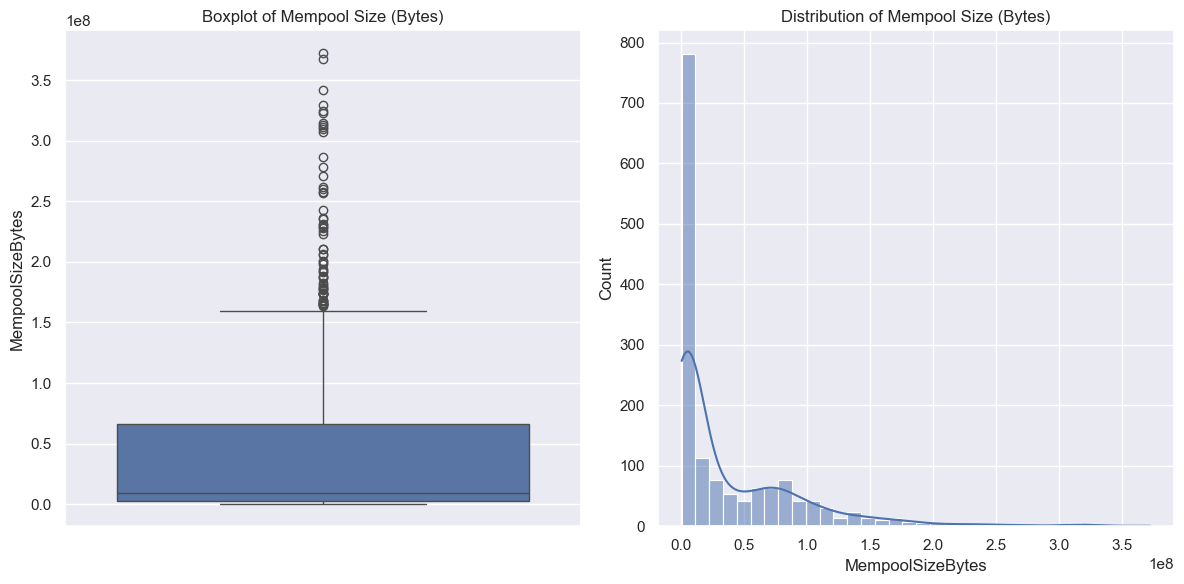

In [59]:
# Basic data exploration
print("\nDataset Info:")
print(df_mempool.info())

print("\nBasic Statistics:")
print(df_mempool.describe())

print("\nMissing Values:")
print(df_mempool.isnull().sum())

# Check for outliers using IQR method
Q1 = df_mempool['MempoolSizeBytes'].quantile(0.25)
Q3 = df_mempool['MempoolSizeBytes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_mempool[(df_mempool['MempoolSizeBytes'] < lower_bound) | 
                      (df_mempool['MempoolSizeBytes'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("\nPercentage of outliers: {:.2f}%".format((len(outliers)/len(df_mempool))*100))

# Visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df_mempool['MempoolSizeBytes'])
plt.title('Boxplot of Mempool Size (Bytes)')

plt.subplot(1,2,2)
sns.histplot(data=df_mempool, x='MempoolSizeBytes', kde=True)
plt.title('Distribution of Mempool Size (Bytes)')
plt.tight_layout()
plt.show()


In [60]:
# Print de laatste datum in daily_mempoolsize
print(f"Laatste datum in mempool size data: {daily_mempoolsize['Timestamp'].max()}")


Laatste datum in mempool size data: 2025-05-10 00:00:00


# Total Transaction Fees (BTC) Gemiddel per dag
### Data Inladen

In [61]:
import requests
import pandas as pd

url = "https://api.blockchain.info/charts/transaction-fees?timespan=all&rollingAverage=1days&format=json"
data = requests.get(url).json()
df = pd.DataFrame(data['values'])
df['x'] = pd.to_datetime(df['x'], unit='s')
df.rename(columns={'x': 'Date', 'y': 'TotalFees_BTC'}, inplace=True)
df.set_index('Date', inplace=True)


In [62]:
# Resample data naar dagelijkse intervallen en interpoleer ontbrekende waarden
daily_fees = df.resample('D').mean().interpolate()

# Reset de index zodat Date weer een kolom wordt
daily_fees = daily_fees.reset_index()

# Filter op datums vanaf 2018-02-01 om consistent te zijn met andere data
daily_fees = daily_fees[daily_fees['Date'] >= '2018-02-01']

print(daily_fees.head())


           Date  TotalFees_BTC
3302 2018-02-01     153.614337
3303 2018-02-02     150.271053
3304 2018-02-03     146.927769
3305 2018-02-04     141.076100
3306 2018-02-05     135.224430


### Data total transcation fee vekennen

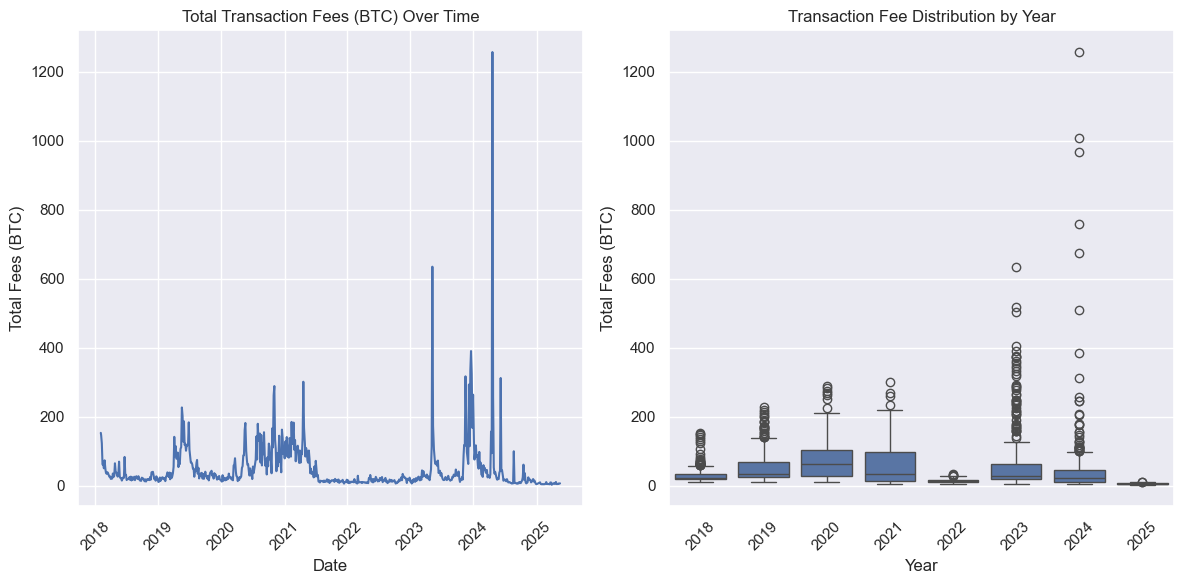

In [63]:
# Visualize the time series data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(daily_fees['Date'], daily_fees['TotalFees_BTC'])
plt.title('Total Transaction Fees (BTC) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Fees (BTC)')
plt.xticks(rotation=45)

# Yearly box plot
plt.subplot(1,2,2)
daily_fees['Year'] = daily_fees['Date'].dt.year
sns.boxplot(x='Year', y='TotalFees_BTC', data=daily_fees)
plt.title('Transaction Fee Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Total Fees (BTC)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2663 entries, 3302 to 5964
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2663 non-null   datetime64[ns]
 1   TotalFees_BTC  2663 non-null   float64       
 2   Year           2663 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 72.8 KB
None

Basic Statistics:
                      Date  TotalFees_BTC         Year
count                 2663    2663.000000  2663.000000
mean   2021-09-24 00:00:00      47.943267  2021.241457
min    2018-02-01 00:00:00       3.148434  2018.000000
25%    2019-11-28 12:00:00      15.376604  2019.000000
50%    2021-09-24 00:00:00      24.560464  2021.000000
75%    2023-07-21 12:00:00      57.387198  2023.000000
max    2025-05-17 00:00:00    1257.715445  2025.000000
std                    NaN      67.808544     2.122094

Missing Values:
Date             0
T

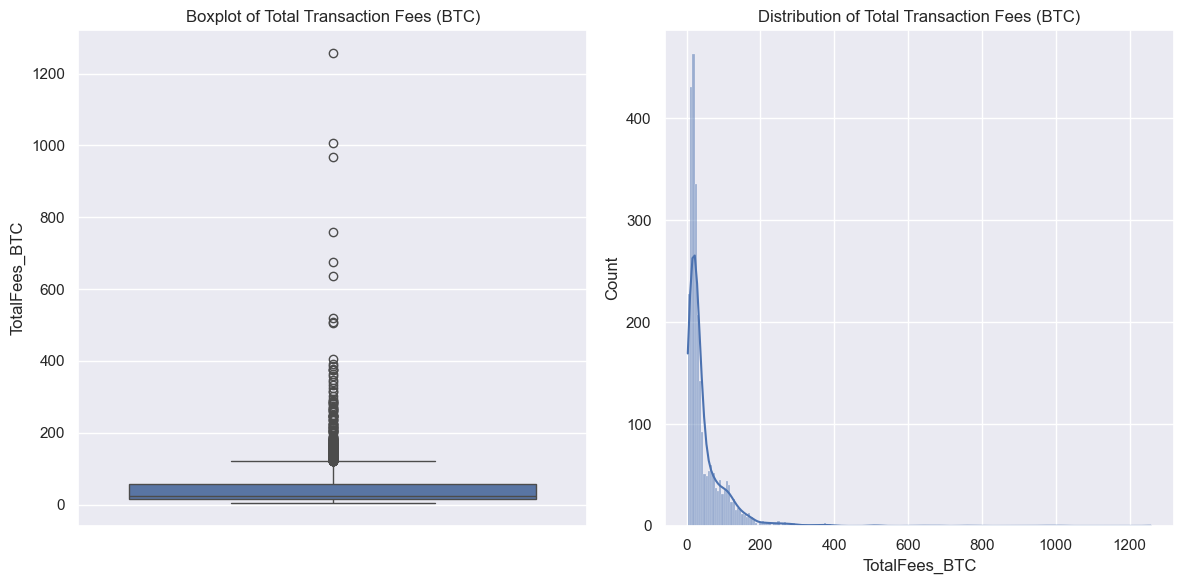

In [64]:
# Basic data exploration
print("\nDataset Info:")
print(daily_fees.info())

print("\nBasic Statistics:")
print(daily_fees.describe())

print("\nMissing Values:")
print(daily_fees.isnull().sum())

# Check for outliers using IQR method
Q1 = daily_fees['TotalFees_BTC'].quantile(0.25)
Q3 = daily_fees['TotalFees_BTC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = daily_fees[(daily_fees['TotalFees_BTC'] < lower_bound) | 
                     (daily_fees['TotalFees_BTC'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("\nPercentage of outliers: {:.2f}%".format((len(outliers)/len(daily_fees))*100))

# Visualize distribution
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=daily_fees['TotalFees_BTC'])
plt.title('Boxplot of Total Transaction Fees (BTC)')

plt.subplot(1,2,2)
sns.histplot(data=daily_fees, x='TotalFees_BTC', kde=True)
plt.title('Distribution of Total Transaction Fees (BTC)')
plt.tight_layout()
plt.show()


In [65]:
# Print de laatste datum in daily_fees
print(f"Laatste datum in transaction fees data: {daily_fees['Date'].max()}")


Laatste datum in transaction fees data: 2025-05-17 00:00:00


# Feature Engineering van Mempool Data

### Gemiddelde Fee per transaction Feature maken (Feature Engineering) en deze feature data verkennen

In [66]:
# Hernoem 'date' naar 'Date' in daily_transaction_count voor consistentie
daily_transaction_count = daily_transaction_count.rename(columns={'date': 'Date'})

# Bereken gemiddelde fee per transactie
avg_fees = pd.merge(daily_fees, daily_transaction_count, on='Date', how='inner')
avg_fees['avg_fee_per_tx'] = avg_fees['TotalFees_BTC'] / avg_fees['mempool_transaction_count']

# Print eerste paar rijen om te controleren
print(avg_fees.head())


        Date  TotalFees_BTC  Year  mempool_transaction_count  avg_fee_per_tx
0 2018-02-01     153.614337  2018               17755.520833        0.008652
1 2018-02-02     150.271053  2018               17401.867188        0.008635
2 2018-02-03     146.927769  2018               17048.213542        0.008618
3 2018-02-04     141.076100  2018               12023.375000        0.011733
4 2018-02-05     135.224430  2018                6998.536458        0.019322


In [67]:
avg_fees['avg_fee_per_tx_sats'] = avg_fees['avg_fee_per_tx'] * 1e8

print("Gemiddelde fees per transactie (in satoshis):")
print(avg_fees['avg_fee_per_tx_sats'].describe())


Gemiddelde fees per transactie (in satoshis):
count    2.656000e+03
mean     4.170535e+05
std      4.344920e+05
min      3.077085e+03
25%      1.026467e+05
50%      3.221100e+05
75%      5.540457e+05
max      4.896868e+06
Name: avg_fee_per_tx_sats, dtype: float64


### Dataset gemiddelde fee per transactie verkennen

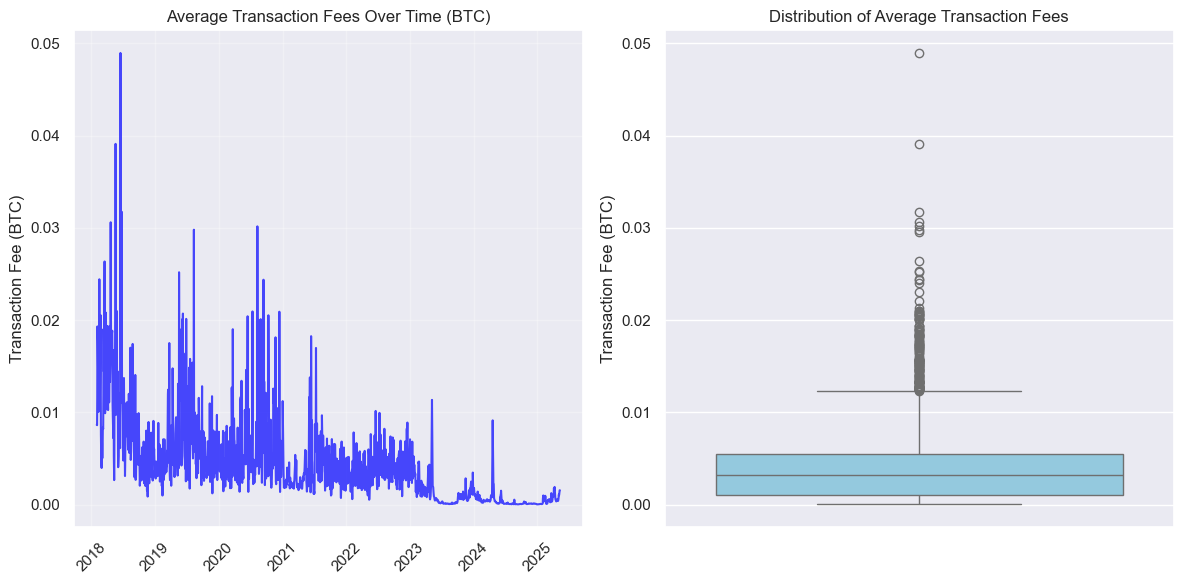

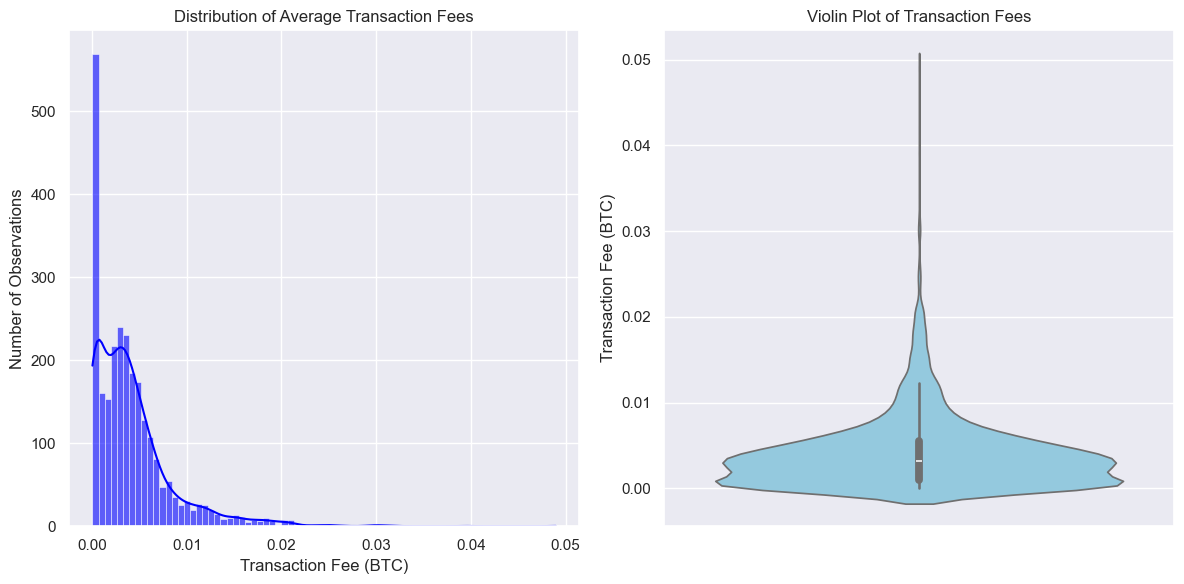

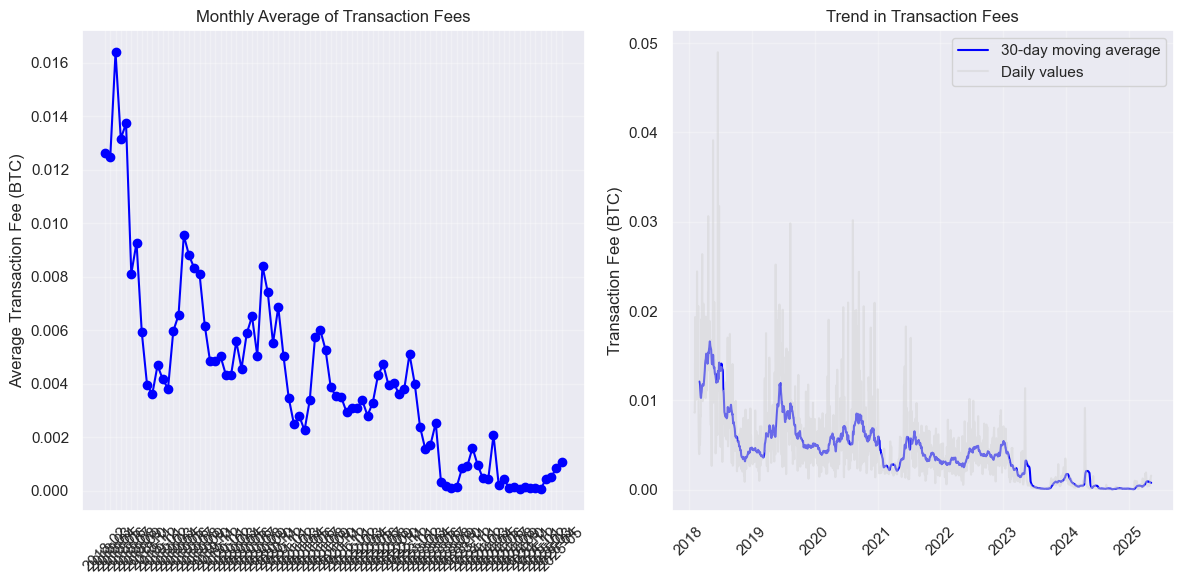

In [68]:
# Visualisatie van gemiddelde transactiekosten
plt.figure(figsize=(12,6))

# Plot 1 -> Time series of average fee per transaction
plt.subplot(1,2,1)
plt.plot(avg_fees['Date'], avg_fees['avg_fee_per_tx'], color='blue', alpha=0.7)
plt.title('Average Transaction Fees Over Time (BTC)')
plt.xticks(rotation=45)
plt.ylabel('Transaction Fee (BTC)')
plt.grid(True, alpha=0.3)

# Plot 2: Boxplot of average fees
plt.subplot(1,2,2)
sns.boxplot(y=avg_fees['avg_fee_per_tx'], color='skyblue')
plt.title('Distribution of Average Transaction Fees')
plt.ylabel('Transaction Fee (BTC)')

plt.tight_layout()
plt.show()

# Histogram and KDE plot
plt.figure(figsize=(12,6))

# Plot 1: Histogram with KDE
plt.subplot(1,2,1)
sns.histplot(data=avg_fees, x='avg_fee_per_tx', kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Average Transaction Fees')
plt.xlabel('Transaction Fee (BTC)')
plt.ylabel('Number of Observations')

# Plot 2: Violin plot
plt.subplot(1,2,2)
sns.violinplot(y=avg_fees['avg_fee_per_tx'], color='skyblue')
plt.title('Violin Plot of Transaction Fees')
plt.ylabel('Transaction Fee (BTC)')

plt.tight_layout()
plt.show()

# Monthly average and trend
plt.figure(figsize=(12,6))

# Plot 1: Monthly average
avg_fees['Month'] = avg_fees['Date'].dt.to_period('M')
monthly_avg = avg_fees.groupby('Month')['avg_fee_per_tx'].mean()

plt.subplot(1,2,1)
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, color='blue', marker='o')
plt.title('Monthly Average of Transaction Fees')
plt.xticks(rotation=45)
plt.ylabel('Average Transaction Fee (BTC)')
plt.grid(True, alpha=0.3)

# Plot 2: Rolling mean
plt.subplot(1,2,2)
plt.plot(avg_fees['Date'], avg_fees['avg_fee_per_tx'].rolling(window=30).mean(), 
         color='blue', label='30-day moving average')
plt.plot(avg_fees['Date'], avg_fees['avg_fee_per_tx'], 
         color='lightgray', alpha=0.5, label='Daily values')
plt.title('Trend in Transaction Fees')
plt.xticks(rotation=45)
plt.ylabel('Transaction Fee (BTC)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Omzetten van Avg fee per transactie in BTC naar USD

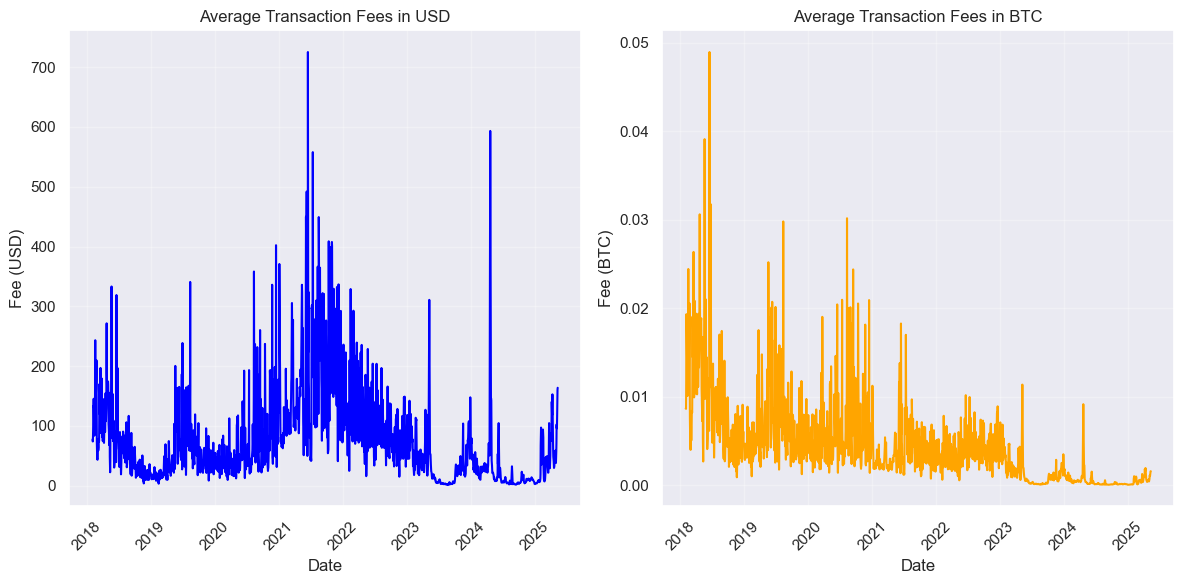

,Date,TotalFees_BTC,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,Close,avg_fee_usd
0,2018-02-01,153.614337,2018,17755.520833,0.008652,8.651638e+05,2018-02,8970.00,77.605192
1,2018-02-02,150.271053,2018,17401.867188,0.008635,8.635341e+05,2018-02,8580.00,74.091224
2,2018-02-03,146.927769,2018,17048.213542,0.008618,8.618367e+05,2018-02,9386.72,80.898202
3,2018-02-04,141.076100,2018,12023.375000,0.011733,1.173349e+06,2018-02,8301.65,97.407292
4,2018-02-05,135.224430,2018,6998.536458,0.019322,1.932182e+06,2018-02,6877.61,132.887911
...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,5.548709,2025,5294.166667,0.001048,1.048080e+05,2025-05,96814.00,101.468797
2652,2025-05-07,5.988170,2025,4905.541667,0.001221,1.220695e+05,2025-05,97054.00,118.473324
2653,2025-05-08,6.427630,2025,4516.916667,0.001423,1.423013e+05,2025-05,103261.00,146.941729
2654,2025-05-09,6.867091,2025,4407.296875,0.001558,1.558119e+05,2025-05,102991.00,160.472189


In [69]:
# Make sure both dataframes have datetime columns with same name
avg_fees['Date'] = pd.to_datetime(avg_fees['Date'])
df_combined['Date'] = pd.to_datetime(df_combined['Timestamp'])

# Merge data on date
merged = pd.merge(avg_fees, df_combined[['Date', 'Close']], on='Date', how='inner')

# Calculate fee in USD
merged['avg_fee_usd'] = merged['avg_fee_per_tx'] * merged['Close']

plt.figure(figsize=(12,6))

# Plot 1: Fees in USD
plt.subplot(1,2,1)
plt.plot(merged['Date'], merged['avg_fee_usd'], color='blue')
plt.title('Average Transaction Fees in USD')
plt.xlabel('Date')
plt.ylabel('Fee (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Fees in BTC
plt.subplot(1,2,2)
plt.plot(merged['Date'], merged['avg_fee_per_tx'], color='orange')
plt.title('Average Transaction Fees in BTC')
plt.xlabel('Date')
plt.ylabel('Fee (BTC)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

merged


### Log transformaties

In [70]:
# Log transformatie van gemiddelde fees per transactie
avg_fees['avg_fee_per_tx_log'] = np.log1p(avg_fees['avg_fee_per_tx'])

print("Log-getransformeerde gemiddelde fees per transactie:")
print(avg_fees['avg_fee_per_tx_log'].describe())


Log-getransformeerde gemiddelde fees per transactie:
count    2656.000000
mean        0.004153
std         0.004304
min         0.000031
25%         0.001026
50%         0.003216
75%         0.005525
max         0.047807
Name: avg_fee_per_tx_log, dtype: float64


In [71]:
# Print de laatste datum in avg_fees
print(f"Laatste datum in avg_fees data: {avg_fees['Date'].max()}")


Laatste datum in avg_fees data: 2025-05-10 00:00:00


Log transformatie van daily mempool size (in bytes)

In [72]:
# Log transformatie van mempool size
daily_mempoolsize['log_mempool_size'] = np.log1p(daily_mempoolsize['MempoolSizeBytes'])
daily_mempoolsize

,Timestamp,MempoolSizeBytes,log_mempool_size
596,2018-02-01,5.210158e+07,17.768706
597,2018-02-02,5.232593e+07,17.773003
598,2018-02-03,5.255029e+07,17.777281
599,2018-02-04,3.624007e+07,17.405676
600,2018-02-05,1.992984e+07,16.807729
...,...,...,...
3247,2025-05-06,2.914383e+06,14.885169
3248,2025-05-07,5.357911e+06,15.494085
3249,2025-05-08,7.801438e+06,15.869819
3250,2025-05-09,7.244612e+06,15.795769


### Percentuele verandering per dag van de mempool size in bytes

In [73]:
# Add percentage change column for mempool size
daily_mempoolsize['mempool_size_pct_change'] = daily_mempoolsize['MempoolSizeBytes'].pct_change().fillna(method='bfill')
daily_mempoolsize


C:\Users\boris\AppData\Local\Temp\ipykernel_15404\2684330719.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_mempoolsize['mempool_size_pct_change'] = daily_mempoolsize['MempoolSizeBytes'].pct_change().fillna(method='bfill')


,Timestamp,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change
596,2018-02-01,5.210158e+07,17.768706,0.004306
597,2018-02-02,5.232593e+07,17.773003,0.004306
598,2018-02-03,5.255029e+07,17.777281,0.004288
599,2018-02-04,3.624007e+07,17.405676,-0.310374
600,2018-02-05,1.992984e+07,16.807729,-0.450061
...,...,...,...,...
3247,2025-05-06,2.914383e+06,14.885169,0.086380
3248,2025-05-07,5.357911e+06,15.494085,0.838437
3249,2025-05-08,7.801438e+06,15.869819,0.456060
3250,2025-05-09,7.244612e+06,15.795769,-0.071375


In [74]:
# Import pandas 
import pandas as pd

# Voeg alle kolommen van avg_fees en daily_mempoolsize samen
mempool_features = pd.merge(avg_fees, daily_mempoolsize, 
                          left_on='Date', right_on='Timestamp', how='inner')

# Verwijder de redundante Timestamp kolom
mempool_features = mempool_features.drop('Timestamp', axis=1)

# Zet Date als index
mempool_features = mempool_features.set_index('Date')

print(mempool_features.head(5))


            TotalFees_BTC  Year  mempool_transaction_count  avg_fee_per_tx  \
Date                                                                         
2018-02-01     153.614337  2018               17755.520833        0.008652   
2018-02-02     150.271053  2018               17401.867188        0.008635   
2018-02-03     146.927769  2018               17048.213542        0.008618   
2018-02-04     141.076100  2018               12023.375000        0.011733   
2018-02-05     135.224430  2018                6998.536458        0.019322   

            avg_fee_per_tx_sats    Month  avg_fee_per_tx_log  \
Date                                                           
2018-02-01         8.651638e+05  2018-02            0.008614   
2018-02-02         8.635341e+05  2018-02            0.008598   
2018-02-03         8.618367e+05  2018-02            0.008581   
2018-02-04         1.173349e+06  2018-02            0.011665   
2018-02-05         1.932182e+06  2018-02            0.019138   

    

In [75]:
merged

,Date,TotalFees_BTC,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,Close,avg_fee_usd
0,2018-02-01,153.614337,2018,17755.520833,0.008652,8.651638e+05,2018-02,8970.00,77.605192
1,2018-02-02,150.271053,2018,17401.867188,0.008635,8.635341e+05,2018-02,8580.00,74.091224
2,2018-02-03,146.927769,2018,17048.213542,0.008618,8.618367e+05,2018-02,9386.72,80.898202
3,2018-02-04,141.076100,2018,12023.375000,0.011733,1.173349e+06,2018-02,8301.65,97.407292
4,2018-02-05,135.224430,2018,6998.536458,0.019322,1.932182e+06,2018-02,6877.61,132.887911
...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,5.548709,2025,5294.166667,0.001048,1.048080e+05,2025-05,96814.00,101.468797
2652,2025-05-07,5.988170,2025,4905.541667,0.001221,1.220695e+05,2025-05,97054.00,118.473324
2653,2025-05-08,6.427630,2025,4516.916667,0.001423,1.423013e+05,2025-05,103261.00,146.941729
2654,2025-05-09,6.867091,2025,4407.296875,0.001558,1.558119e+05,2025-05,102991.00,160.472189


In [76]:
# Voeg avg_fee_usd toe aan mempool_features
# We moeten eerst de indexen gelijk maken voordat we de kolom toevoegen
merged_copy = merged.copy()
merged_copy.set_index('Date', inplace=True)

mempool_features['avg_fee_usd'] = merged_copy['avg_fee_usd']

# Print om te controleren
mempool_features


,TotalFees_BTC,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
Date,,,,,,,,,,,
2018-02-01,153.614337,2018,17755.520833,0.008652,8.651638e+05,2018-02,0.008614,5.210158e+07,17.768706,0.004306,77.605192
2018-02-02,150.271053,2018,17401.867188,0.008635,8.635341e+05,2018-02,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2018-02-03,146.927769,2018,17048.213542,0.008618,8.618367e+05,2018-02,0.008581,5.255029e+07,17.777281,0.004288,80.898202
2018-02-04,141.076100,2018,12023.375000,0.011733,1.173349e+06,2018-02,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
2018-02-05,135.224430,2018,6998.536458,0.019322,1.932182e+06,2018-02,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-06,5.548709,2025,5294.166667,0.001048,1.048080e+05,2025-05,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2025-05-07,5.988170,2025,4905.541667,0.001221,1.220695e+05,2025-05,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2025-05-08,6.427630,2025,4516.916667,0.001423,1.423013e+05,2025-05,0.001422,7.801438e+06,15.869819,0.456060,146.941729


# Nieuw dataset maken met alle nieuwe features 
### (baseline + mempool features)

In [77]:
# kopie van df_combined om de originele data te behouden
df_eindmodel = df_combined.copy()

# Merge df_combined met mempool_features op basis van Timestamp/Date
df_eindmodel = pd.merge(
    df_eindmodel,
    mempool_features,
    left_on='Timestamp',
    right_index=True,
    how='inner'
)

# Print eerste paar rijen om te controleren
df_eindmodel

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,...,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,...,2018,17755.520833,0.008652,8.651638e+05,2018-02,0.008614,5.210158e+07,17.768706,0.004306,77.605192
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,...,2018,17401.867188,0.008635,8.635341e+05,2018-02,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,...,2018,17048.213542,0.008618,8.618367e+05,2018-02,0.008581,5.255029e+07,17.777281,0.004288,80.898202
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,...,2018,12023.375000,0.011733,1.173349e+06,2018-02,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,...,2018,6998.536458,0.019322,1.932182e+06,2018-02,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,...,2025,5294.166667,0.001048,1.048080e+05,2025-05,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,...,2025,4905.541667,0.001221,1.220695e+05,2025-05,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,...,2025,4516.916667,0.001423,1.423013e+05,2025-05,0.001422,7.801438e+06,15.869819,0.456060,146.941729
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,...,2025,4407.296875,0.001558,1.558119e+05,2025-05,0.001557,7.244612e+06,15.795769,-0.071375,160.472189


In [134]:
# Print de eerste en laatste datum in de dataset
print(f"Eerste datum in dataset: {df_eindmodel['Timestamp'].min()}")
print(f"Laatste datum in dataset: {df_eindmodel['Timestamp'].max()}")


Eerste datum in dataset: 2018-02-01 00:00:00
Laatste datum in dataset: 2025-05-10 00:00:00


## Model 1 (Baseline + gem fee per transaction)

In [135]:
df_eindmodel

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,...,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,...,2018,17755.520833,0.008652,8.651638e+05,2018-02,0.008614,5.210158e+07,17.768706,0.004306,77.605192
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,...,2018,17401.867188,0.008635,8.635341e+05,2018-02,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,...,2018,17048.213542,0.008618,8.618367e+05,2018-02,0.008581,5.255029e+07,17.777281,0.004288,80.898202
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,...,2018,12023.375000,0.011733,1.173349e+06,2018-02,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,...,2018,6998.536458,0.019322,1.932182e+06,2018-02,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,...,2025,5294.166667,0.001048,1.048080e+05,2025-05,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,...,2025,4905.541667,0.001221,1.220695e+05,2025-05,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,...,2025,4516.916667,0.001423,1.423013e+05,2025-05,0.001422,7.801438e+06,15.869819,0.456060,146.941729
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,...,2025,4407.296875,0.001558,1.558119e+05,2025-05,0.001557,7.244612e+06,15.795769,-0.071375,160.472189


In [262]:
# Drop  kolommen die ik niet mee wil nemen in model training
columns_to_drop = [
    'return_pct',
    'next_close', 
    'TotalFees_BTC',
    'mempool_transaction_count',
    'avg_fee_per_tx',
    'avg_fee_per_tx_sats',
    'MempoolSizeBytes'
]

df_eindmodel = df_eindmodel.drop(columns=columns_to_drop)


In [264]:
window_size = 30
feature_columns = [col for col in df_eindmodel.columns if col not in ['Timestamp', 'y']]  # alle inputfeatures

X = []
y = []

for i in range(len(df_eindmodel) - window_size):
    X.append(df_eindmodel[feature_columns].iloc[i:i+window_size].values)
    y.append(df_eindmodel['y'].iloc[i + window_size])  # gebruik bestaande label

X = np.array(X)
y = np.array(y)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (2626, 30, 10)
y shape: (2626,)


In [265]:
# Bepaal totale lengte
n_total = X.shape[0]

# Bepaal de indices voor de splitsing (70% train, 15% val, 15% test)
train_end = int(n_total * 0.7)
val_end = int(n_total * 0.85)

# Splits X en y op basis van tijdsvolgorde
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

# Print shapes om te checken
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (1838, 30, 10) (1838,)
Validation: (394, 30, 10) (394,)
Test: (394, 30, 10) (394,)


In [266]:
X_train.shape

(1838, 30, 10)

[0]	validation_0-mlogloss:1.09443	validation_1-mlogloss:1.09857
[1]	validation_0-mlogloss:1.09062	validation_1-mlogloss:1.09789
[2]	validation_0-mlogloss:1.08728	validation_1-mlogloss:1.09504
[3]	validation_0-mlogloss:1.08359	validation_1-mlogloss:1.09481
[4]	validation_0-mlogloss:1.07982	validation_1-mlogloss:1.09489
[5]	validation_0-mlogloss:1.07620	validation_1-mlogloss:1.09338
[6]	validation_0-mlogloss:1.07278	validation_1-mlogloss:1.09298
[7]	validation_0-mlogloss:1.06922	validation_1-mlogloss:1.09348
[8]	validation_0-mlogloss:1.06611	validation_1-mlogloss:1.09446
[9]	validation_0-mlogloss:1.06300	validation_1-mlogloss:1.09349
[10]	validation_0-mlogloss:1.05998	validation_1-mlogloss:1.09286
[11]	validation_0-mlogloss:1.05699	validation_1-mlogloss:1.09038
[12]	validation_0-mlogloss:1.05412	validation_1-mlogloss:1.09022
[13]	validation_0-mlogloss:1.05140	validation_1-mlogloss:1.09105
[14]	validation_0-mlogloss:1.04879	validation_1-mlogloss:1.09213
[15]	validation_0-mlogloss:1.04621	

c:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[17]	validation_0-mlogloss:1.04110	validation_1-mlogloss:1.08755
[18]	validation_0-mlogloss:1.03851	validation_1-mlogloss:1.08650
[19]	validation_0-mlogloss:1.03596	validation_1-mlogloss:1.08544
[20]	validation_0-mlogloss:1.03346	validation_1-mlogloss:1.08511
[21]	validation_0-mlogloss:1.03121	validation_1-mlogloss:1.08510
[22]	validation_0-mlogloss:1.02883	validation_1-mlogloss:1.08404
[23]	validation_0-mlogloss:1.02625	validation_1-mlogloss:1.08270
[24]	validation_0-mlogloss:1.02426	validation_1-mlogloss:1.08227
[25]	validation_0-mlogloss:1.02213	validation_1-mlogloss:1.08070
[26]	validation_0-mlogloss:1.01982	validation_1-mlogloss:1.08153
[27]	validation_0-mlogloss:1.01763	validation_1-mlogloss:1.07970
[28]	validation_0-mlogloss:1.01547	validation_1-mlogloss:1.07802
[29]	validation_0-mlogloss:1.01268	validation_1-mlogloss:1.07723
[30]	validation_0-mlogloss:1.01059	validation_1-mlogloss:1.07654
[31]	validation_0-mlogloss:1.00900	validation_1-mlogloss:1.07635
[32]	validation_0-mloglos

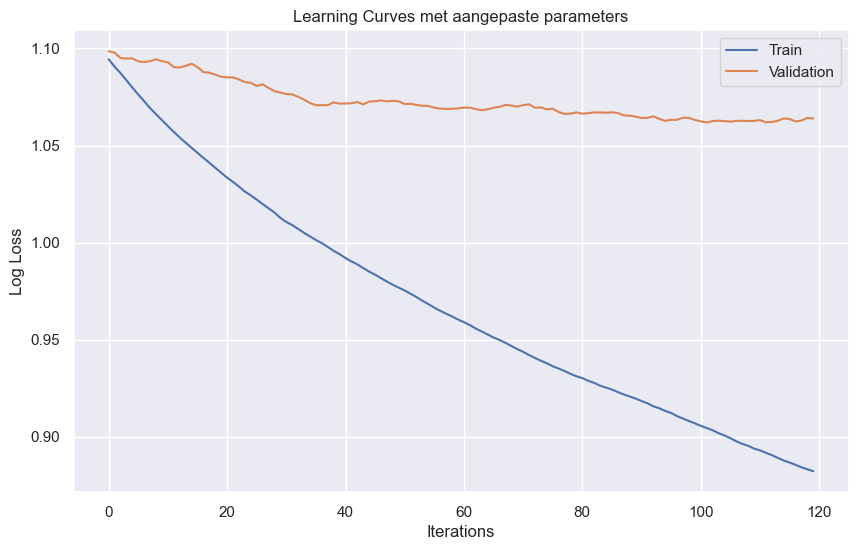

Validation performance:
              precision    recall  f1-score   support

          -1       0.22      0.40      0.28        90
           0       0.52      0.39      0.44       186
           1       0.34      0.26      0.30       118

    accuracy                           0.35       394
   macro avg       0.36      0.35      0.34       394
weighted avg       0.40      0.35      0.36       394



In [267]:
# Train model met aangepaste parameters
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    random_state=42,
    max_depth=3,              # Maximum depth van bomen
    learning_rate=0.05,        # Learning rate / eta
    n_estimators=120,         # Aantal boosting rondes
    min_child_weight=1,       # Minimum som van instance weight in een child
    gamma=1,                  # Minimum loss reduction voor split
    subsample=0.8,           # Fractie samples voor training
    colsample_bytree=0.6,    # Fractie features per boom
    reg_alpha=0,             # L1 regularization
    reg_lambda=5,            # L2 regularization
    scale_pos_weight=1       # Balans positieve/negatieve weights
)

# learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
model.fit(
    X_train_flat, 
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot learning curves
results = model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['mlogloss'], label='Train')
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curves met aangepaste parameters')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("Validation performance:")
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END colsample_bytree=0.8, gamma=1.0, learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=250, reg_alpha=0.5, reg_lambda=5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=1.0, learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=250, reg_alpha=0.5, reg_lambda=5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=1.0, learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=250, reg_alpha=0.5, reg_lambda=5, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=20, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.03, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=1.0, reg_lambda=20, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0

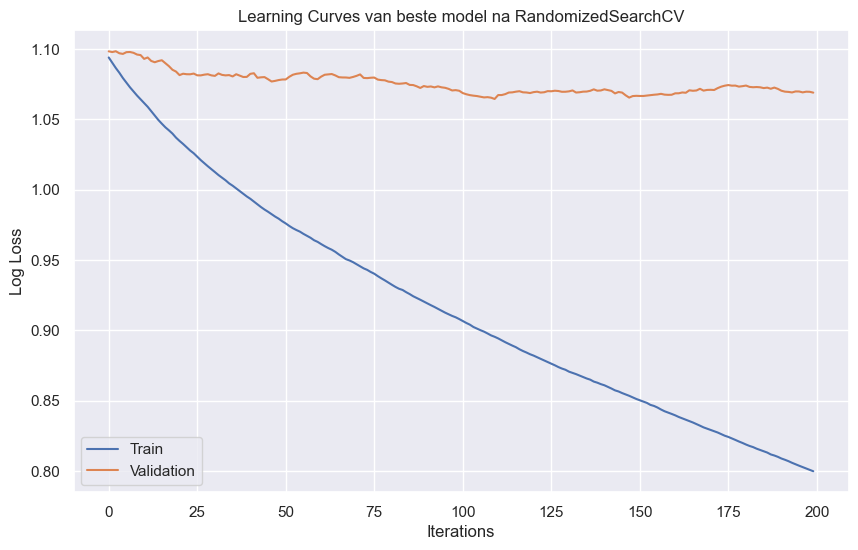


Validation performance van beste model:
              precision    recall  f1-score   support

          -1       0.26      0.39      0.31        90
           0       0.65      0.47      0.54       186
           1       0.36      0.38      0.37       118

    accuracy                           0.42       394
   macro avg       0.42      0.41      0.41       394
weighted avg       0.47      0.42      0.44       394



In [268]:
# Labels converteren van [-1, 0, 1] naar [0, 1, 2]
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Sample weights berekenen op basis van trainingslabels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# Hyperparameter grid
param_dist = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [150, 200, 250],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [5, 10, 20],
    'min_child_weight': [5, 10, 20],
    'gamma': [0.1, 0.5, 1.0]
}

# Basis XGBoost model
xgb_base = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

# Randomized search met progress bar
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=1  # Single job to avoid pickling errors
)

# Fit zonder callback (gebruik verbose=2 voor voortgang)
search.fit(X_train_flat, y_train_adj, sample_weight=sample_weights)

# Beste params en score
print("\nBeste hyperparameters:")
for param, value in search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBeste f1_macro score: {search.best_score_:.4f}")

# Gebruik beste model en train op volledige trainingsset
best_model = search.best_estimator_

# Voeg validatie toe voor learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
best_model.fit(
    X_train_flat, 
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot learning curves
results = best_model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['mlogloss'], label='Train')
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curves van beste model na RandomizedSearchCV')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = best_model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nValidation performance van beste model:")
print(classification_report(y_val, y_val_pred))


[0]	validation_0-mlogloss:1.09478	validation_1-mlogloss:1.09747
[1]	validation_0-mlogloss:1.09077	validation_1-mlogloss:1.09980
[2]	validation_0-mlogloss:1.08721	validation_1-mlogloss:1.10011
[3]	validation_0-mlogloss:1.08402	validation_1-mlogloss:1.10069
[4]	validation_0-mlogloss:1.08109	validation_1-mlogloss:1.10024
[5]	validation_0-mlogloss:1.07832	validation_1-mlogloss:1.09776
[6]	validation_0-mlogloss:1.07542	validation_1-mlogloss:1.09587
[7]	validation_0-mlogloss:1.07275	validation_1-mlogloss:1.09488
[8]	validation_0-mlogloss:1.07016	validation_1-mlogloss:1.09475
[9]	validation_0-mlogloss:1.06803	validation_1-mlogloss:1.09419
[10]	validation_0-mlogloss:1.06542	validation_1-mlogloss:1.09278
[11]	validation_0-mlogloss:1.06299	validation_1-mlogloss:1.09229
[12]	validation_0-mlogloss:1.06063	validation_1-mlogloss:1.09005
[13]	validation_0-mlogloss:1.05816	validation_1-mlogloss:1.09022
[14]	validation_0-mlogloss:1.05565	validation_1-mlogloss:1.09019
[15]	validation_0-mlogloss:1.05327	

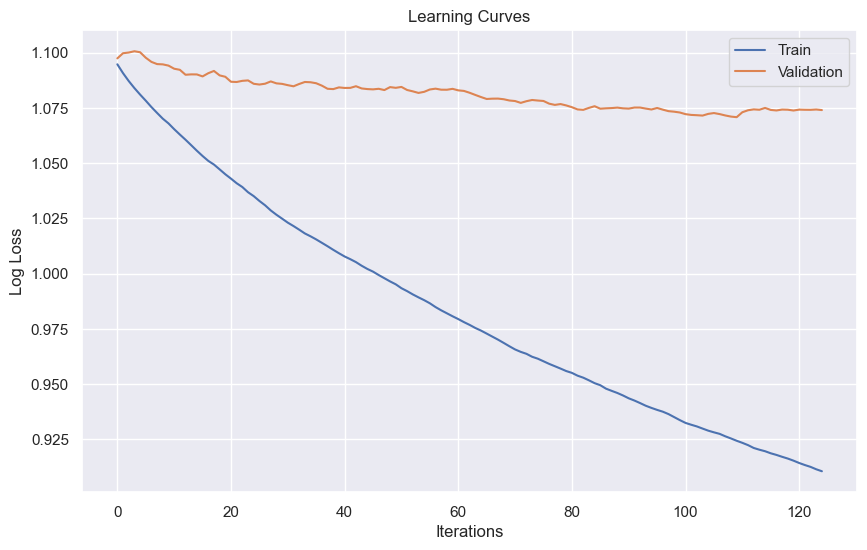


Validation performance:
              precision    recall  f1-score   support

          -1       0.31      0.58      0.40        90
           0       0.69      0.47      0.56       186
           1       0.37      0.31      0.34       118

    accuracy                           0.45       394
   macro avg       0.46      0.45      0.44       394
weighted avg       0.51      0.45      0.46       394



In [271]:
# Labels converteren van [-1, 0, 1] naar [0, 1, 2]
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Sample weights berekenen op basis van trainingslabels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# XGBoost model met gekozen hyperparameters
model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=0.5,
    n_estimators=125,
    min_child_weight=20,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.5,
    colsample_bytree=0.7,
    n_jobs=1
)

# Voeg validatie toe voor learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
model.fit(
    X_train_flat,
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot learning curves
results = model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['mlogloss'], label='Train')
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nValidation performance:")
print(classification_report(y_val, y_val_pred))


## Mempool model 1 testen:
### Baseline + mempool (avg fee per transactie)

In [272]:
# Voorspellingen en evaluatie op testset
y_test_pred = model.predict(X_test_flat)
y_test_pred = y_test_pred - 1  # Terug naar originele labels [-1, 0, 1]
# Ensure test predictions and actual labels have same length
y_test_pred = y_test_pred[:len(y_test)]

print("\nTest performance:")
print(classification_report(y_test, y_test_pred))



Test performance:
              precision    recall  f1-score   support

          -1       0.35      0.84      0.49       120
           0       0.62      0.35      0.45       158
           1       0.50      0.06      0.11       116

    accuracy                           0.42       394
   macro avg       0.49      0.42      0.35       394
weighted avg       0.50      0.42      0.36       394



------------------------------------------------------------------

## Model 2 (Baseline Model + mempool size)

In [274]:
# Log transformatie van mempool size
daily_mempoolsize['log_mempool_size'] = np.log1p(daily_mempoolsize['MempoolSizeBytes'])
daily_mempoolsize

,Timestamp,MempoolSizeBytes,log_mempool_size
596,2018-02-01,5.210158e+07,17.768706
597,2018-02-02,5.232593e+07,17.773003
598,2018-02-03,5.255029e+07,17.777281
599,2018-02-04,3.624007e+07,17.405676
600,2018-02-05,1.992984e+07,16.807729
...,...,...,...
3247,2025-05-06,2.914383e+06,14.885169
3248,2025-05-07,5.357911e+06,15.494085
3249,2025-05-08,7.801438e+06,15.869819
3250,2025-05-09,7.244612e+06,15.795769


In [275]:
# Add percentage change column for mempool size
daily_mempoolsize['mempool_size_pct_change'] = daily_mempoolsize['MempoolSizeBytes'].pct_change().fillna(method='bfill')
daily_mempoolsize


C:\Users\boris\AppData\Local\Temp\ipykernel_10432\2684330719.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_mempoolsize['mempool_size_pct_change'] = daily_mempoolsize['MempoolSizeBytes'].pct_change().fillna(method='bfill')


,Timestamp,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change
596,2018-02-01,5.210158e+07,17.768706,0.004306
597,2018-02-02,5.232593e+07,17.773003,0.004306
598,2018-02-03,5.255029e+07,17.777281,0.004288
599,2018-02-04,3.624007e+07,17.405676,-0.310374
600,2018-02-05,1.992984e+07,16.807729,-0.450061
...,...,...,...,...
3247,2025-05-06,2.914383e+06,14.885169,0.086380
3248,2025-05-07,5.357911e+06,15.494085,0.838437
3249,2025-05-08,7.801438e+06,15.869819,0.456060
3250,2025-05-09,7.244612e+06,15.795769,-0.071375


In [276]:
# Merge mempool features with main dataframe
df_eindmodel = pd.merge(df_eindmodel, 
                       daily_mempoolsize[['Timestamp', 'log_mempool_size', 'mempool_size_pct_change']], 
                       on='Timestamp', 
                       how='left')


In [277]:
df_eindmodel

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,y,avg_fee_per_tx_log,log_mempool_size,mempool_size_pct_change
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,-1,0.008614,17.768706,0.004306
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,1,0.008598,17.773003,0.004306
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,-1,0.008581,17.777281,0.004288
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,-1,0.011665,17.405676,-0.310374
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,1,0.019138,16.807729,-0.450061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,0,0.001048,14.885169,0.086380
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,1,0.001220,15.494085,0.838437
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,0,0.001422,15.869819,0.456060
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,1,0.001557,15.795769,-0.071375


In [281]:
df_eindmodel = df_eindmodel.drop('avg_fee_per_tx_log', axis=1)

In [282]:
print("Columns in df_eindmodel:")
for col in df_eindmodel.columns:
    print(col)


Columns in df_eindmodel:
Timestamp
Open
High
Low
Close
Volume
MA7
MA30
fear_greed_index
market_regime
y
log_mempool_size
mempool_size_pct_change


In [283]:
window_size = 30
feature_columns = [col for col in df_eindmodel.columns if col not in ['Timestamp', 'y']]  # alle inputfeatures

X = []
y = []

for i in range(len(df_eindmodel) - window_size):
    X.append(df_eindmodel[feature_columns].iloc[i:i+window_size].values)
    y.append(df_eindmodel['y'].iloc[i + window_size])  # gebruik bestaande label

X = np.array(X)
y = np.array(y)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (2626, 30, 11)
y shape: (2626,)


In [285]:
# Bepaal totale lengte
n_total = X.shape[0]

# Bepaal de indices voor de splitsing (70% train, 15% val, 15% test)
train_end = int(n_total * 0.7)
val_end = int(n_total * 0.85)

# Splits X en y op basis van tijdsvolgorde
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

# Print shapes om te checken
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (1838, 30, 11) (1838,)
Validation: (394, 30, 11) (394,)
Test: (394, 30, 11) (394,)


# Model trainen met standaard instellingen: 

[0]	validation_0-mlogloss:1.01298	validation_1-mlogloss:1.07539
[1]	validation_0-mlogloss:0.94448	validation_1-mlogloss:1.07289
[2]	validation_0-mlogloss:0.88190	validation_1-mlogloss:1.09543
[3]	validation_0-mlogloss:0.82909	validation_1-mlogloss:1.08840
[4]	validation_0-mlogloss:0.79148	validation_1-mlogloss:1.07803
[5]	validation_0-mlogloss:0.74998	validation_1-mlogloss:1.07912
[6]	validation_0-mlogloss:0.72414	validation_1-mlogloss:1.08225
[7]	validation_0-mlogloss:0.70654	validation_1-mlogloss:1.08585
[8]	validation_0-mlogloss:0.67655	validation_1-mlogloss:1.08680
[9]	validation_0-mlogloss:0.65808	validation_1-mlogloss:1.08996
[10]	validation_0-mlogloss:0.63871	validation_1-mlogloss:1.08990
[11]	validation_0-mlogloss:0.61898	validation_1-mlogloss:1.09619
[12]	validation_0-mlogloss:0.59027	validation_1-mlogloss:1.09244
[13]	validation_0-mlogloss:0.57768	validation_1-mlogloss:1.09904
[14]	validation_0-mlogloss:0.54862	validation_1-mlogloss:1.09432
[15]	validation_0-mlogloss:0.52675	

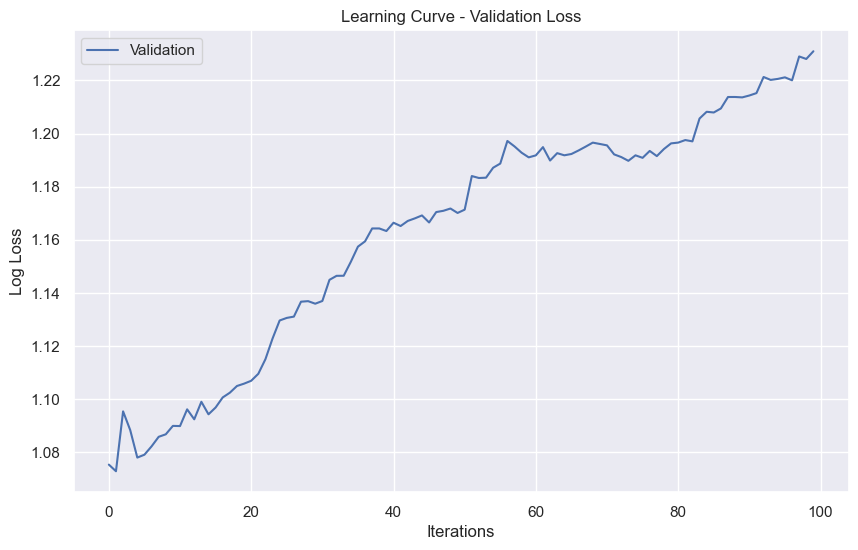

In [139]:
# Import required libraries
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight

# Labels converteren van [-1, 0, 1] naar [0, 1, 2]
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Sample weights berekenen op basis van trainingslabels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# Basis XGBoost model met standaard instellingen
model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

# Flatten input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Voeg validatie toe voor learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
model.fit(
    X_train_flat, 
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot alleen validation loss
results = model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curve - Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]



# Model trainen met Grid Search

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.008, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=20, subsample=0.7; total time=   3.2s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.008, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=20, subsample=0.7; total time=   3.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.008, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=0.1, reg_lambda=20, subsample=0.7; total time=   2.9s
[CV] END colsample_bytree=0.7, gamma=1.0, learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=140, reg_alpha=0.5, reg_lambda=10, subsample=0.7; total time=   4.3s
[CV] END colsample_bytree=0.7, gamma=1.0, learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=140, reg_alpha=0.5, reg_lambda=10, subsample=0.7; total time=   6.2s
[CV] END colsample_bytree=0.7, gamma=1.0, learnin

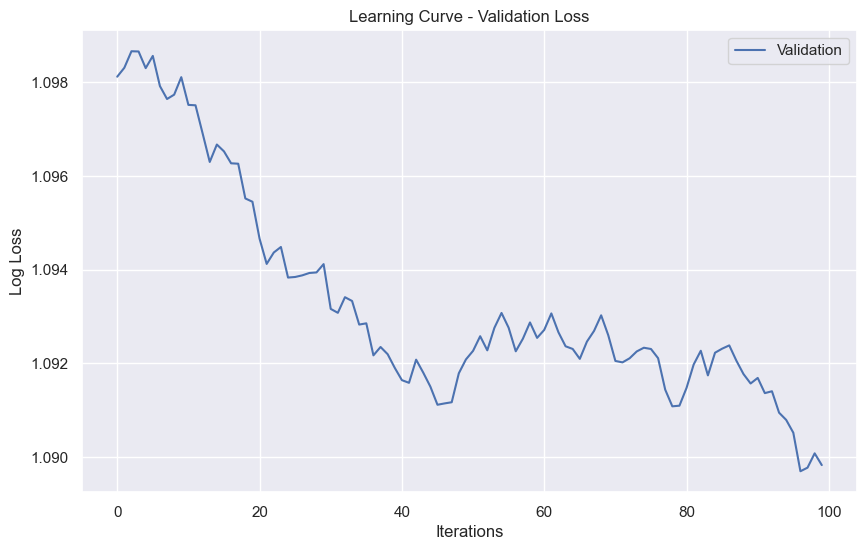


Validation performance van beste model:
              precision    recall  f1-score   support

          -1       0.28      0.47      0.35        90
           0       0.68      0.39      0.49       186
           1       0.32      0.38      0.35       118

    accuracy                           0.40       394
   macro avg       0.43      0.41      0.40       394
weighted avg       0.48      0.40      0.42       394



In [302]:
# Labels converteren van [-1, 0, 1] naar [0, 1, 2]
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Sample weights berekenen op basis van trainingslabels
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# Hyperparameter grid
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.008, 0.01, 0.012],
    'n_estimators': [100, 120, 140],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [5, 10, 20],
    'min_child_weight': [5, 10, 20],
    'gamma': [0.1, 0.5, 1.0]
}

# Basis XGBoost model
xgb_base = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

# Flatten input data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Randomized search met progress bar
search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=1  
)

# Fit zonder callback (gebruik verbose=2 voor voortgang)
search.fit(X_train_flat, y_train_adj, sample_weight=sample_weights)

# Beste params en score
print("\nBeste hyperparameters:")
for param, value in search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBeste f1_macro score: {search.best_score_:.4f}")

# Gebruik beste model en train op volledige trainingsset
best_model = search.best_estimator_

# Voeg validatie toe voor learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
best_model.fit(
    X_train_flat, 
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot alleen validation loss
results = best_model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curve - Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = best_model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nValidation performance van beste model:")
print(classification_report(y_val, y_val_pred))


[0]	validation_0-mlogloss:1.09686	validation_1-mlogloss:1.09834
[1]	validation_0-mlogloss:1.09514	validation_1-mlogloss:1.09846
[2]	validation_0-mlogloss:1.09338	validation_1-mlogloss:1.09839
[3]	validation_0-mlogloss:1.09165	validation_1-mlogloss:1.09848
[4]	validation_0-mlogloss:1.08990	validation_1-mlogloss:1.09869
[5]	validation_0-mlogloss:1.08821	validation_1-mlogloss:1.09886
[6]	validation_0-mlogloss:1.08643	validation_1-mlogloss:1.09844
[7]	validation_0-mlogloss:1.08469	validation_1-mlogloss:1.09826
[8]	validation_0-mlogloss:1.08299	validation_1-mlogloss:1.09835
[9]	validation_0-mlogloss:1.08131	validation_1-mlogloss:1.09864
[10]	validation_0-mlogloss:1.07963	validation_1-mlogloss:1.09818
[11]	validation_0-mlogloss:1.07785	validation_1-mlogloss:1.09832
[12]	validation_0-mlogloss:1.07610	validation_1-mlogloss:1.09809
[13]	validation_0-mlogloss:1.07446	validation_1-mlogloss:1.09769
[14]	validation_0-mlogloss:1.07272	validation_1-mlogloss:1.09790
[15]	validation_0-mlogloss:1.07104	

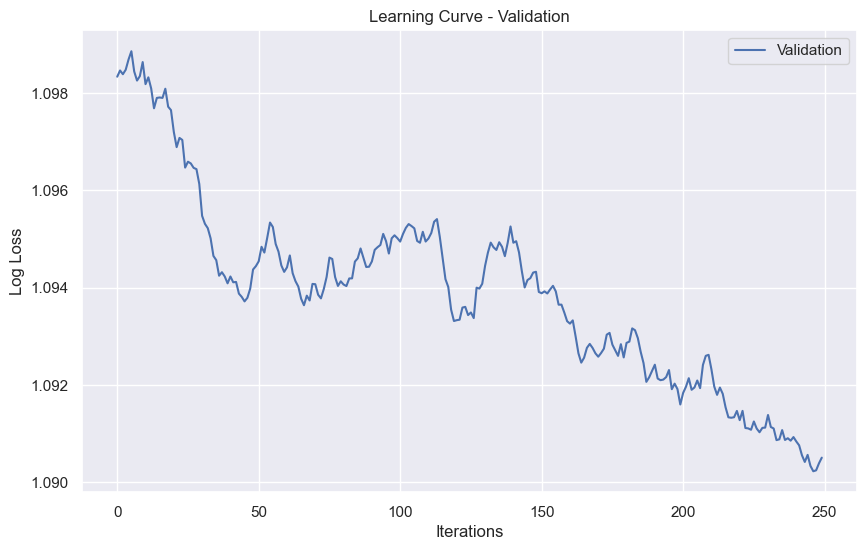


Validation performance:
              precision    recall  f1-score   support

          -1       0.28      0.59      0.38        90
           0       0.68      0.37      0.48       186
           1       0.34      0.31      0.32       118

    accuracy                           0.40       394
   macro avg       0.43      0.42      0.39       394
weighted avg       0.49      0.40      0.41       394



In [317]:
# Train model met aangepaste parameters
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    random_state=42,
    max_depth=20,              # Maximum depth van bomen
    learning_rate=0.005,      # Learning rate / eta
    n_estimators=250,         # Aantal boosting rondes
    min_child_weight=5,       # Minimum som van instance weight in een child
    gamma=0.5,                # Minimum loss reduction voor split
    subsample=0.8,            # Fractie samples voor training
    colsample_bytree=0.8,     # Fractie features per boom
    reg_alpha=0.5,           # L1 regularization
    reg_lambda=5             # L2 regularization
)

# Flatten de 3D input data naar 2D voor XGBoost
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Labels aanpassen van [-1,0,1] naar [0,1,2] voor classificatie
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Bereken sample weights voor gebalanceerde klassen
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_adj)

# Voeg validatie toe voor learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
model.fit(
    X_train_flat, 
    y_train_adj,
    sample_weight=sample_weights,
    eval_set=eval_set,
    verbose=True
)

# Plot learning curves
results = model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curve - Validation')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nValidation performance:")
print(classification_report(y_val, y_val_pred))


## Mepool Model 2 testen:
### Baseline + mempool size features (log en percentuele verandering)

In [318]:
# Voorspellingen en evaluatie op testset
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_test_pred = model.predict(X_test_flat)
y_test_pred = y_test_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nTest performance:")
print(classification_report(y_test, y_test_pred))



Test performance:
              precision    recall  f1-score   support

          -1       0.33      0.82      0.47       120
           0       0.62      0.33      0.43       158
           1       0.31      0.04      0.08       116

    accuracy                           0.39       394
   macro avg       0.42      0.40      0.33       394
weighted avg       0.44      0.39      0.34       394



## Feature Importance analyse

In [329]:
# Merge mempool_featuresA with df_eindmodel
df_eindmodel = pd.merge(df_eindmodel, mempool_features, left_on='Timestamp', right_index=True)

# Remove specified columns
columns_to_drop = ['MempoolSizeBytes', 'avg_fee_per_tx_sats', 'avg_fee_per_tx', 
                  'mempool_transaction_count', 'TotalFees_BTC']
df_eindmodel = df_eindmodel.drop(columns=columns_to_drop)

In [330]:
df_eindmodel

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,log_mempool_size,mempool_size_pct_change,y,avg_fee_per_tx_log
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,17.768706,0.004306,-1,0.008614
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,17.773003,0.004306,1,0.008598
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,17.777281,0.004288,-1,0.008581
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,17.405676,-0.310374,-1,0.011665
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,16.807729,-0.450061,1,0.019138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,14.885169,0.086380,0,0.001048
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,15.494085,0.838437,1,0.001220
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,15.869819,0.456060,0,0.001422
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,15.795769,-0.071375,1,0.001557


In [344]:
# Remove mempool size related columns
columns_to_drop = ['log_mempool_size', 'mempool_size_pct_change']
df_eindmodel = df_eindmodel.drop(columns=columns_to_drop)


In [345]:
window_size = 30
feature_columns = [col for col in df_eindmodel.columns if col not in ['Timestamp', 'y']]  # alle inputfeatures

X = []
y = []

for i in range(len(df_eindmodel) - window_size):
    X.append(df_eindmodel[feature_columns].iloc[i:i+window_size].values)
    y.append(df_eindmodel['y'].iloc[i + window_size])  # gebruik bestaande label

X = np.array(X)
y = np.array(y)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (2626, 30, 10)
y shape: (2626,)


In [346]:
# Print de feature namen
print("Features in X:")
for i, feature in enumerate(feature_columns):
    print(f"{i+1}. {feature}")


Features in X:
1. Open
2. High
3. Low
4. Close
5. Volume
6. MA7
7. MA30
8. fear_greed_index
9. market_regime
10. avg_fee_per_tx_log


In [347]:
# Bepaal totale lengte
n_total = X.shape[0]

# Bepaal de indices voor de splitsing (70% train, 15% val, 15% test)
train_end = int(n_total * 0.7)
val_end = int(n_total * 0.85)

# Splits X en y op basis van tijdsvolgorde
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

# Print shapes om te checken
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (1838, 30, 10) (1838,)
Validation: (394, 30, 10) (394,)
Test: (394, 30, 10) (394,)


c:\Users\boris\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:1.09425	validation_1-mlogloss:1.09809
[1]	validation_0-mlogloss:1.09014	validation_1-mlogloss:1.09793
[2]	validation_0-mlogloss:1.08595	validation_1-mlogloss:1.09806
[3]	validation_0-mlogloss:1.08204	validation_1-mlogloss:1.09871
[4]	validation_0-mlogloss:1.07756	validation_1-mlogloss:1.09867
[5]	validation_0-mlogloss:1.07351	validation_1-mlogloss:1.09899
[6]	validation_0-mlogloss:1.06941	validation_1-mlogloss:1.09874
[7]	validation_0-mlogloss:1.06516	validation_1-mlogloss:1.09836
[8]	validation_0-mlogloss:1.06106	validation_1-mlogloss:1.09911
[9]	validation_0-mlogloss:1.05730	validation_1-mlogloss:1.09978
[10]	validation_0-mlogloss:1.05319	validation_1-mlogloss:1.09900
[11]	validation_0-mlogloss:1.04929	validation_1-mlogloss:1.09847
[12]	validation_0-mlogloss:1.04507	validation_1-mlogloss:1.09769
[13]	validation_0-mlogloss:1.04134	validation_1-mlogloss:1.09841
[14]	validation_0-mlogloss:1.03761	validation_1-mlogloss:1.09830
[15]	validation_0-mlogloss:1.03409	

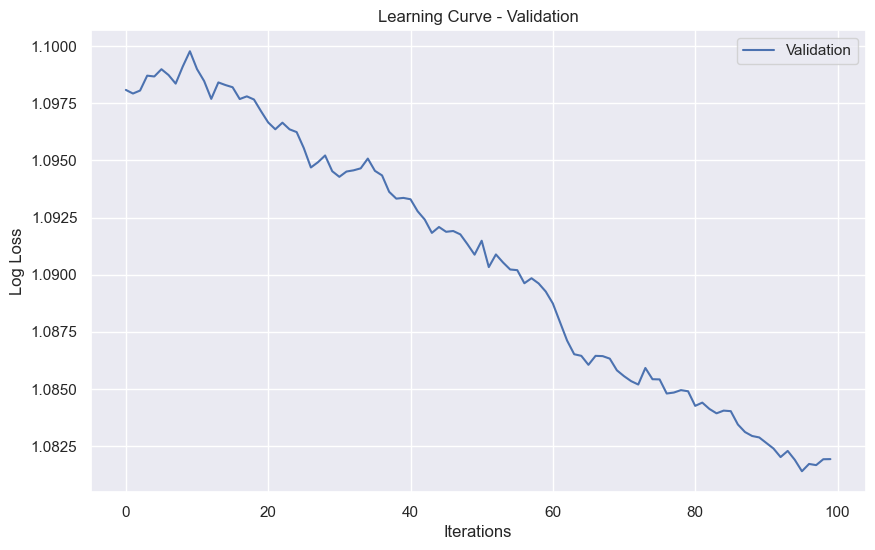


Validation performance:
              precision    recall  f1-score   support

          -1       0.27      0.60      0.38        90
           0       0.61      0.53      0.57       186
           1       0.42      0.13      0.19       118

    accuracy                           0.43       394
   macro avg       0.44      0.42      0.38       394
weighted avg       0.48      0.43      0.41       394



In [348]:
# Train model met aangepaste parameters
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    random_state=42,
    max_depth=9,             
    learning_rate=0.01,       
    n_estimator = 121,      
    min_child_weight=1,     
    gamma=0.7,                
    subsample=0.8,         
    colsample_bytree=0.6,    
    reg_alpha=0,             
    reg_lambda=5           
)

# Flatten de 3D input data naar 2D voor XGBoost
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Labels aanpassen van [-1,0,1] naar [0,1,2] voor classificatie
y_train_adj = y_train + 1
y_val_adj = y_val + 1

# Voeg validatie toe voor learning curves
eval_set = [(X_train_flat, y_train_adj), (X_val_flat, y_val_adj)]

# Training met eval_set
model.fit(
    X_train_flat, 
    y_train_adj,
    eval_set=eval_set,
    verbose=True
)

# Plot learning curves
results = model.evals_result()
plt.figure(figsize=(10, 6))
plt.plot(results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curve - Validation')
plt.legend()
plt.grid(True)
plt.show()

# Voorspellingen en evaluatie op validatieset
y_val_pred = model.predict(X_val_flat)
y_val_pred = y_val_pred - 1  # Terug naar originele labels [-1, 0, 1]

print("\nValidation performance:")
print(classification_report(y_val, y_val_pred))


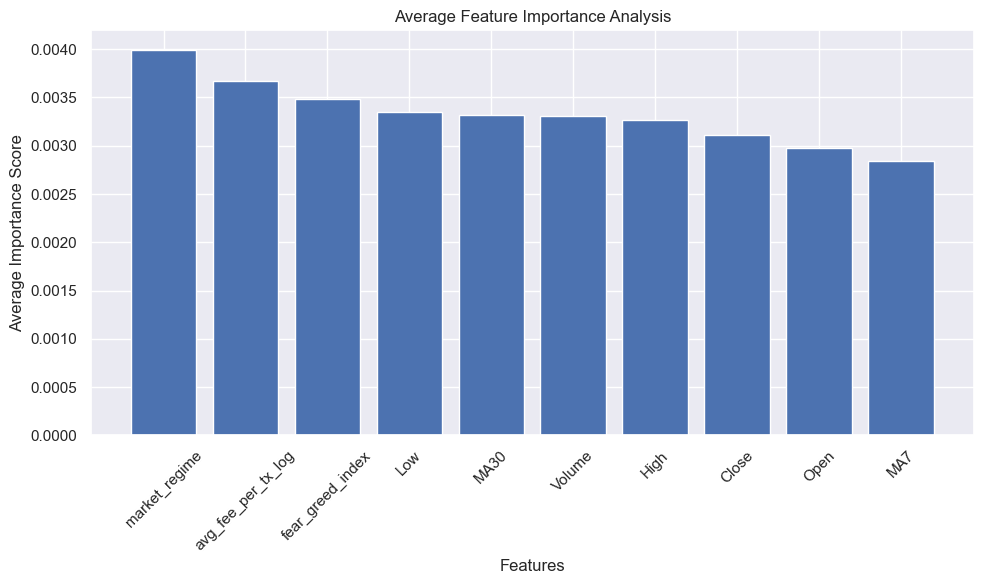


Features Sorted by Average Importance:
              Feature  Average Importance
8       market_regime            0.003995
9  avg_fee_per_tx_log            0.003672
7    fear_greed_index            0.003483
2                 Low            0.003351
6                MA30            0.003323
4              Volume            0.003307
1                High            0.003268
3               Close            0.003116
0                Open            0.002980
5                 MA7            0.002840


In [349]:
# Feature Importance Analysis

# Get feature names
feature_names = feature_columns

# Get feature importance scores and average across time windows
importance_scores = model.feature_importances_
importance_scores = importance_scores.reshape(-1, window_size)
avg_importance = importance_scores.mean(axis=1)

# Create dataframe with feature names and average importance scores
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Average Importance': avg_importance
})

# Sort by importance
feature_importance = feature_importance.sort_values('Average Importance', ascending=False)

# Plot average feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importance['Average Importance'])
plt.xticks(range(len(feature_names)), feature_importance['Feature'], rotation=45)
plt.xlabel('Features')
plt.ylabel('Average Importance Score')
plt.title('Average Feature Importance Analysis')
plt.tight_layout()
plt.show()

# Print features sorted by average importance
print("\nFeatures Sorted by Average Importance:")
print(feature_importance)
